In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sqlite3
import pandas as pd
#from scipy.stats import crystalball, chi2
#from iminuit import Minuit
import matplotlib.colors as mcolors
#from iminuit.util import make_func_code
#from iminuit import describe #, Minuit,
# Set custom color cycle
custom_colors = [    
    '#0081C8',  # Olynmpic Blue
    '#FCB131', # Olympic Yellow
    '#000000', # Olympic Black
    '#00A651',  # Olympic Green
    '#EE334E',  # Olynmpic Red
    '#F47835',  # Olympic Orange
    '#7C878E',  # Olympic Grey
    '#C8102E',  # Olympic Red
    '#EF3340',  # Olympic Red
    '#FFD662',  # Olympic Yellow
    '#00539C',  # Olympic Blue
]

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=custom_colors)


In [ ]:
import sys
sys.path.append('/groups/icecube/simon/GNN/workspace/External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax


: 

In [9]:
panos_file = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_Peter_and_Morten/merged_database/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_130000_888003_retro.db"
con_gcd = sqlite3.connect(panos_file)
cur_gcd = con_gcd.cursor()
cur_gcd.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur_gcd.fetchall())

[('SplitInIcePulses',), ('truth',), ('retro',)]


In [ ]:
pd.set_option('display.max_columns', None)
#load the filtered data from the new database
file_path ='/groups/icecube/simon/GNN/workspace/Scripts/filtered_all_big_data.db'
con = sqlite3.connect(file_path)
# Find the tables in the database
cursor = con.cursor()
#cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#print(cursor.fetchall())
x = 100000
pulse_query = f"""
    SELECT position_x,position_y,position_z, event_no
    FROM truth
    WHERE event_no IN (
        SELECT DISTINCT event_no
        FROM truth
        ORDER BY event_no
        LIMIT {x}
    )
    """
pulse_query_srt = f"""
    SELECT dom_x, dom_y, dom_z, charge, dom_time, event_no, string, rde, dom_number
    FROM SplitInIcePulsesSRT
    WHERE event_no IN (
        SELECT DISTINCT event_no
        FROM truth
        ORDER BY event_no
        LIMIT {x}
    )
    """
df_truth = pd.read_sql_query(pulse_query, con)
df_splits = pd.read_sql_query(pulse_query, con)
#df_line = pd.read_sql_query("SELECT * FROM linefit_finitereco_ic", con)
#df_splits.head()



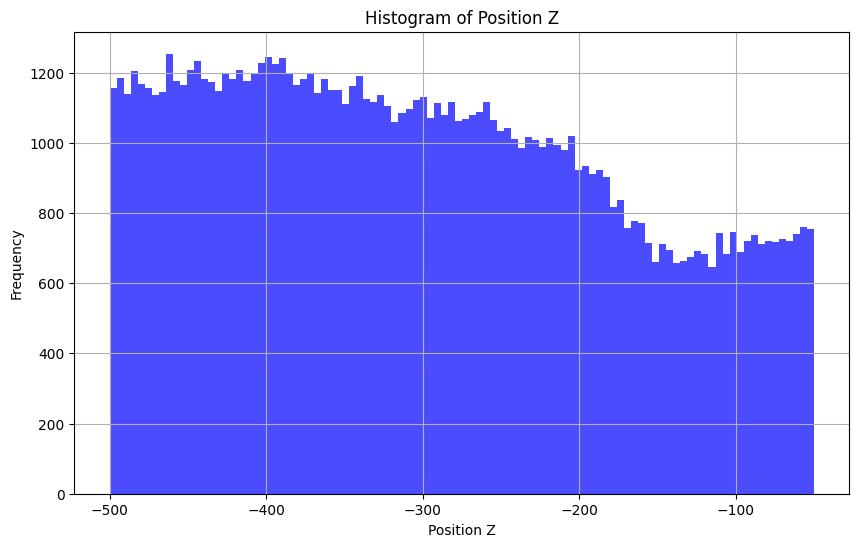

In [5]:
position_z = df_truth['position_z'].values
plt.figure(figsize=(10, 6))
plt.hist(position_z, bins=100, color='blue', alpha=0.7)
plt.xlabel('Position Z')
plt.ylabel('Frequency')
plt.title('Histogram of Position Z')
plt.grid()
plt.show()


In [3]:
df_line.head()


,line_pos_x,line_pos_y,line_pos_z,line_zenith,line_azimuth,line_speed,stop_pos_x,stop_pos_y,stop_pos_z,tracklength,LFVel,LFVelX,LFVelY,LFVelZ,nHits,Length,endFraction,startFraction,Sdet,finiteCut,DetectorLength,event_no
0,149.447661,159.336794,-216.642515,2.085708,4.443836,1.165589,254.206002,539.998655,6.752962,453.633444,1.165589,0.269171,0.978092,0.574004,9.0,727.562133,0.073929,0.391317,-0.391317,0.263505,1360.554364,0
1,15.694594,-69.280941,-232.156134,0.859755,4.578049,0.050346,24.846619,-1.565188,-291.012757,90.184726,0.050346,0.005109,0.037802,-0.032857,21.0,106.139385,0.363435,0.562320,-0.562320,0.201750,1429.583954,1
2,260.427619,402.252381,-35.472857,0.301858,0.762715,0.281392,166.034665,312.047329,-454.789755,439.173817,0.281392,-0.060480,-0.057797,-0.268669,21.0,822.785217,0.128467,0.143743,-0.166323,0.040698,1130.524754,2
3,-155.798503,-111.900023,-162.276210,2.240935,0.414989,0.039926,-452.579193,-242.654359,94.731321,413.797470,0.039926,-0.028636,-0.012616,0.024798,18.0,754.480196,0.182636,0.321782,-0.321782,-0.045825,1522.414433,3
4,57.290000,-83.685000,-253.868527,3.096511,1.963494,0.042310,57.341791,-83.810034,-250.868527,3.003051,0.042310,0.000730,-0.001762,0.042267,2.0,224.692047,0.743175,0.039578,0.632064,-0.706890,1034.274041,4


In [5]:
df_truth.head()

,energy,position_x,position_y,position_z,azimuth,zenith,pid,event_time,sim_type,interaction_type,elasticity,RunID,SubrunID,EventID,SubEventID,dbang_decay_length,track_length,stopped_muon,energy_track,energy_cascade,inelasticity,DeepCoreFilter_13,CascadeFilter_13,MuonFilter_13,OnlineL2Filter_17,L3_oscNext_bool,L4_oscNext_bool,L5_oscNext_bool,L6_oscNext_bool,L7_oscNext_bool,DeepCoreUpgradeFilter_13,event_no
0,162.407362,192.752845,361.861393,-168.818436,1.043174,0.670917,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,4.0,0.0,-1.0,627.547441,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0
1,346.093807,160.684346,324.482361,-445.287665,0.747727,0.309455,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,8.0,0.0,-1.0,1307.389196,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1
2,346.093807,160.684346,324.482361,-445.287665,0.747727,0.309455,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,8.0,1.0,-1.0,1307.389196,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,2
3,280.020316,-347.474631,-182.217924,-73.723574,3.251713,0.470328,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,10.0,0.0,-1.0,930.611369,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,3
4,277.560873,-230.681450,-140.157156,-523.187130,2.703531,0.700000,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,23.0,0.0,-1.0,959.810321,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,4


In [7]:
#print the dom_x and dom_y values of string 85
df_splits.query("string == 85")[["dom_x", "dom_y"]].drop_duplicates().head()

,dom_x,dom_y
177,-9.68,-79.5


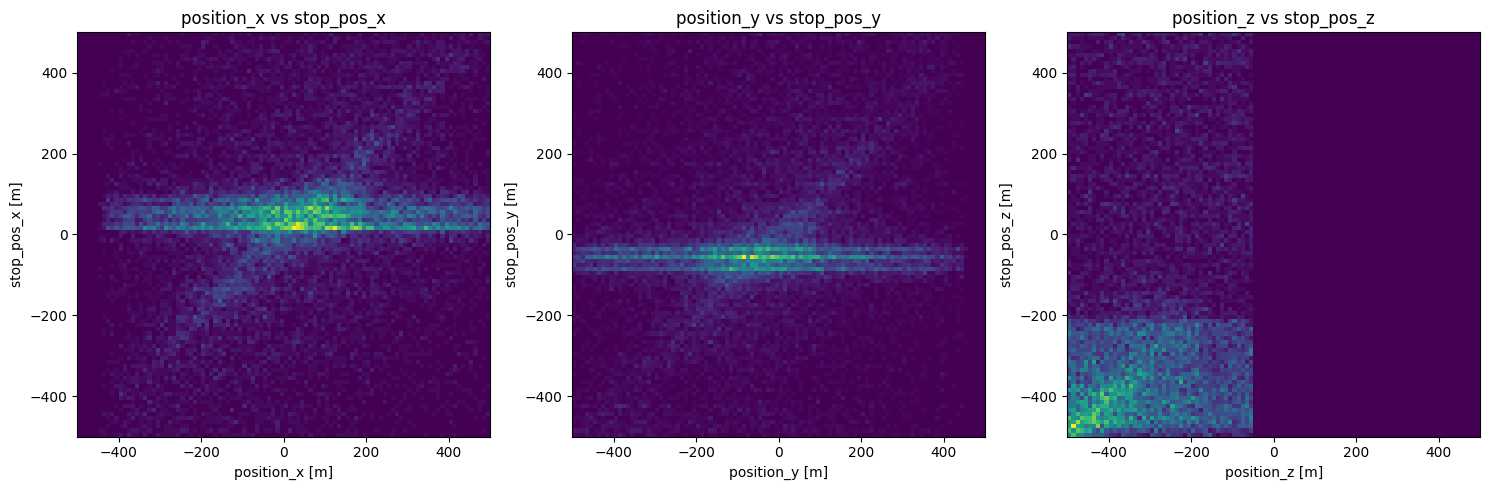

In [5]:
#Make three heats showcasing position_x,position_y,position_z from df_truth vs stop_pos_x, stop_pos_y and stop_pos_z from df_line
position_x, position_y, position_z = df_truth["position_x"], df_truth["position_y"], df_truth["position_z"]
stop_pos_x, stop_pos_y, stop_pos_z = df_line["stop_pos_x"], df_line["stop_pos_y"], df_line["stop_pos_z"]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(position_x, stop_pos_x, bins=100, range=[[-500, 500], [-500, 500]])
ax[0].set_xlabel("position_x [m]")
ax[0].set_ylabel("stop_pos_x [m]")
ax[0].set_title("position_x vs stop_pos_x")
ax[1].hist2d(position_y, stop_pos_y, bins=100, range=[[-500, 500], [-500, 500]])
ax[1].set_xlabel("position_y [m]")
ax[1].set_ylabel("stop_pos_y [m]")
ax[1].set_title("position_y vs stop_pos_y")
ax[2].hist2d(position_z, stop_pos_z, bins=100, range=[[-500, 500], [-500, 500]])
ax[2].set_xlabel("position_z [m]")
ax[2].set_ylabel("stop_pos_z [m]")
ax[2].set_title("position_z vs stop_pos_z")
plt.tight_layout()
plt.show()


In [5]:
z_start = -13.792029 + 642.896244*np.cos(0.810170)
x_start = -304.682738 + 642.896244*np.sin(0.810170)*np.cos(4.164466)
y_start = -185.969129 + 642.896244*np.sin(0.810170)*np.sin(4.164466)

print(x_start, y_start, z_start)

x_end = -547.2818 + 642.896244*np.sin(np.pi - 0.810170)*np.cos(4.164466- np.pi)
y_end =  -583.508907 + 642.896244*np.sin(np.pi - 0.810170)*np.sin(4.164466- np.pi)
z_end = 429.40475 + 642.896244*np.cos(np.pi - 0.810170)
print(x_end, y_end, z_end)

-547.2818159315518 -583.5089076866981 429.40475832793123
-304.6827220684482 -185.96912831330195 -13.792037327931268


In [6]:
df_splits.head()
#Print the max dom_number and the max string number

#print(df_splits['dom_number'].max())
#print x,y,z of dom with max dom_number
#print(df_splits[df_splits['dom_number'] == 60])
#print(df_splits['string'].max())
print(len(df_splits['dom_number'].unique()))


116


In [7]:
# Constants
c = 0.299792458  # Speed of light in vacuum (m/ns)
n_ice = 1.34  # Refractive index of ice
v_photon = c / n_ice  # Speed of light in ice
v_muon = 0.98 * c  # Muon velocity (assumed to be close to the speed of light)
theta_c = np.arccos(1 / n_ice)  # Cherenkov angle in radians


In [8]:
# Count the amount of events in the truth data #151148
n_events = len(df_truth['event_no'].unique())
print(f"Number of events: {n_events}")

# Number of events without a mask 665742, after mask is applied 151148

Number of events: 151148


In [9]:
x_dom, y_dom, z_dom = df_splits['dom_x'].values, df_splits['dom_y'].values, df_splits['dom_z'].values
charge = df_splits['charge'].values
#start_time = df_truth['Time_Prim'].values
charge_time = df_splits['dom_time'].values
x, y, z = df_truth['position_x'].values, df_truth['position_y'].values, df_truth['position_z'].values
energy = df_truth['energy'].values
track_length = df_truth['track_length'].values
zenith, azimuth = df_truth['zenith'].values, df_truth['azimuth'].values


In [3]:
#Plot the energy distribution for events which trigger hqe_data = df_splits[df_splits['rde'] == 1.35]
hqe_data = df_splits[df_splits['rde'] == 1.35]
hqe_eventno = hqe_data['event_no'].unique()
hqe_truth = df_truth[df_truth['event_no'].isin(hqe_eventno)]
#Find the unique event numbers in the hqe_truth data
hqe_energy = hqe_truth['energy'].values
print(f"Number of events in HQE data: {len(hqe_energy)}")
plt.hist(hqe_energy, bins=100, range = (0, 1000), histtype='step', label='HQE')
plt.xlabel('Energy [GeV]')
plt.ylabel('Counts')
plt.legend()
plt.show()

plt.hist(energy, bins=100, range = (0,1000), histtype='step', label='All events')
plt.xlabel('Energy [GeV]')
plt.xlim(0,1000)
plt.ylabel('Counts')


NameError: name 'df_splits' is not defined

In [11]:
# Define DeepCore fiducial volume parameters
deepcore_origin = np.array([46.29, -34.88, -330.0])  # Origin of the cylinder (x, y, z)
deepcore_radius = 150.0  # Radius of the cylinder in the XY plane
z_min, z_max = -511.93000000000006, -151.93000000000006  # Z-range of the cylinder

def is_inside_deepcore(position):
    """
    Check if a given position is within the DeepCore fiducial volume.
    
    Parameters:
    - position: numpy array containing (x, y, z) coordinates of the particle's stopping point.
    
    Returns:
    - bool: True if the position is within the DeepCore volume, False otherwise.
    """
    # Calculate radial distance in the XY plane from the DeepCore origin
    xy_distance = np.linalg.norm(position[:2] - deepcore_origin[:2])
    
    # Check if position is within both the radial and z constraints of the DeepCore volume
    if xy_distance <= deepcore_radius and z_min <= position[2] <= z_max:
        return True
    return False

def count_and_record_particles_stopping_in_deepcore(df_secondary):
    """
    Count particles that stop within the DeepCore fiducial volume and record their event numbers.
    
    Parameters:
    - df_secondary: DataFrame containing the stopping positions of particles.
    
    Returns:
    - tuple: (int, list) where the int is the number of particles that stop inside the DeepCore volume,
             and the list contains the event numbers of these particles.
    """
    count = 0
    stopping_event_nos = []
    
    for index, row in df_secondary.iterrows():
        # Get the stopping position of the particle (adjust column names as needed)
        stop_position = np.array([row['position_x'], row['position_y'], row['position_z']])
        #azimuth, zenith, track_length = row['azimuth'], row['zenith'], row['track_length']
        #stop_position = start_position + np.array([track_length * np.sin(zenith) * np.cos(azimuth),
        #                                           track_length * np.sin(zenith) * np.sin(azimuth),
        #                                           track_length * np.cos(np.pi - zenith)])
        
        
        
        # Check if the particle stops within the DeepCore volume
        if is_inside_deepcore(stop_position):
            count += 1  # Particle stops within the DeepCore volume
            stopping_event_nos.append(row['event_no'])  # Record the event number

    return count, stopping_event_nos

count, event_nos = count_and_record_particles_stopping_in_deepcore(df_truth)
print(f"Number of particles stopping in DeepCore: {count}")
print(f"Event numbers of particles stopping in DeepCore: {event_nos}")


Number of particles stopping in DeepCore: 13019
Event numbers of particles stopping in DeepCore: [38, 50, 55, 167, 184, 232, 234, 297, 320, 610, 642, 783, 820, 829, 892, 909, 1093, 1123, 1198, 1267, 1321, 1324, 1357, 1419, 1448, 1599, 1649, 1687, 1745, 1746, 1797, 1877, 1885, 1888, 1981, 1982, 2101, 2114, 2116, 2131, 2209, 2211, 2241, 2366, 2404, 2521, 2621, 2709, 2733, 2787, 2818, 2858, 2894, 2940, 2971, 3002, 3049, 3105, 3180, 3214, 3216, 3253, 3296, 3330, 3452, 3498, 3560, 3573, 3653, 3876, 3923, 4088, 4089, 4111, 4165, 4196, 4258, 4269, 4298, 4323, 4374, 4519, 4536, 4574, 4603, 4606, 4658, 4707, 4830, 4838, 4858, 4898, 4917, 4952, 4969, 4985, 5025, 5077, 5136, 5197, 5267, 5438, 5442, 5509, 5537, 5692, 5713, 5828, 5871, 5872, 5928, 5984, 5985, 6062, 6111, 6122, 6153, 6287, 6315, 6364, 6407, 6459, 6508, 6533, 6536, 6540, 6703, 6767, 6901, 6924, 6965, 7004, 7006, 7026, 7110, 7165, 7228, 7265, 7311, 7352, 7369, 7375, 7387, 7404, 7437, 7467, 7496, 7522, 7670, 7757, 7774, 7882, 7908, 793

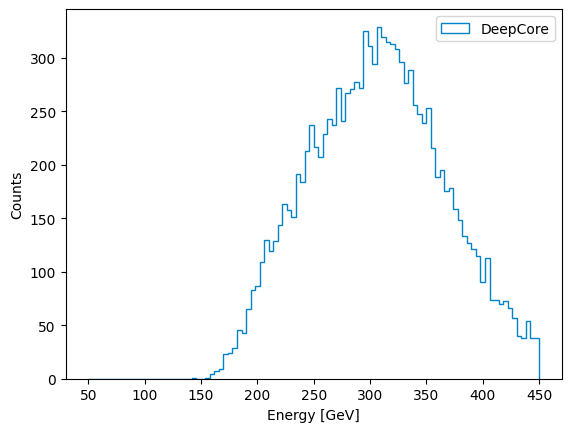

In [12]:
# Make a energy histogram of the particles stopping in DeepCore
deepcore_data = df_truth[df_truth['event_no'].isin(event_nos)]
deepcore_energy = deepcore_data['energy'].values
plt.hist(deepcore_energy, bins=100, range=(50, 450), histtype='step', label='DeepCore')
plt.xlabel('Energy [GeV]')
plt.ylabel('Counts')
plt.legend()
plt.show()


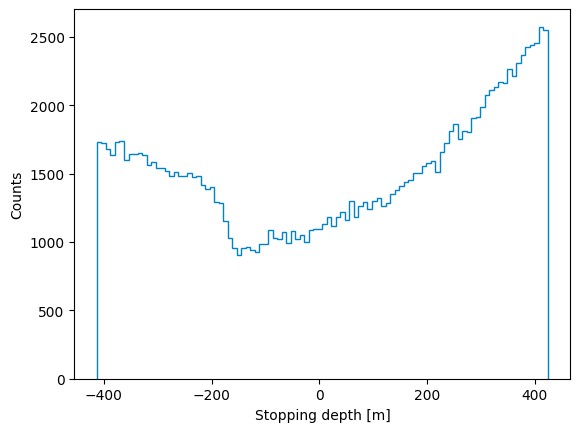

424.5550708230281


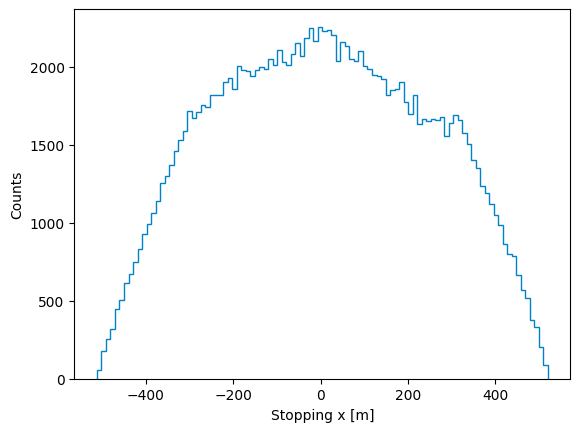

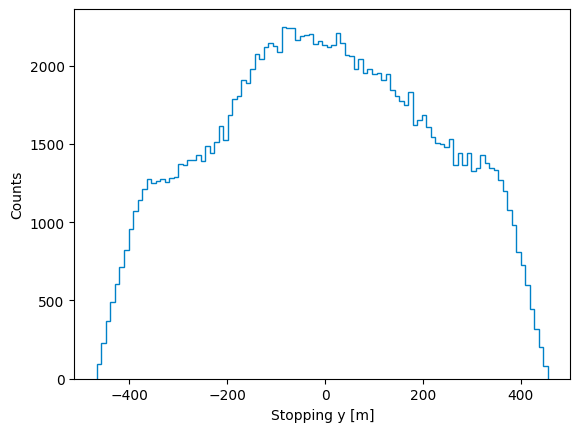

In [13]:
#Make a plot of the stopping positionss depth distribution
#Calculate the stopping depth of each particle
stopping_depths = df_truth['position_z'] + (df_truth['track_length'] * np.cos(np.pi-df_truth['zenith']))
starting_depths = df_truth['position_z']
#plt.hist(stopping_depths, bins=100, histtype='step')
plt.hist(starting_depths, bins=100, histtype='step')
plt.xlabel('Stopping depth [m]')
plt.ylabel('Counts')
plt.show()
print(df_truth['position_z'].max())

#stopping_x = df_truth['position_x'] + (df_truth['track_length'] * np.sin(np.pi-df_truth['zenith']) * np.cos(df_truth['azimuth']-np.pi))
#stopping_x_corrected = df_truth['position_x'] + (df_truth['track_length'] * np.sin(df_truth['zenith']) * np.cos(df_truth['azimuth']))

plt.hist(df_truth['position_x'], bins=100, histtype='step')
#plt.hist(stopping_x_corrected, bins=100, histtype='step')
plt.xlabel('Stopping x [m]')
plt.ylabel('Counts')
plt.show()

stoppping_y = df_truth['position_y'] + (df_truth['track_length'] * np.sin(np.pi-df_truth['zenith']) * np.sin(df_truth['azimuth']-np.pi))
#stopping_y_corrected = df_truth['position_y'] + (df_truth['track_length'] * np.sin(df_truth['zenith']) * np.sin(df_truth['azimuth']-np.pi))
plt.hist(df_truth['position_y'], bins=100, histtype='step')
#plt.hist(stopping_y_corrected, bins=100, histtype='step')
plt.xlabel('Stopping y [m]')
plt.ylabel('Counts')
plt.show()


In [14]:
#Convert df_completed to a csv file
df_grid = df_splits[['string', 'dom_number', 'dom_x', 'dom_y', 'dom_z']].drop_duplicates()
df_grid.to_csv('completed.csv', index=False)


Number of unique dom positions: 93


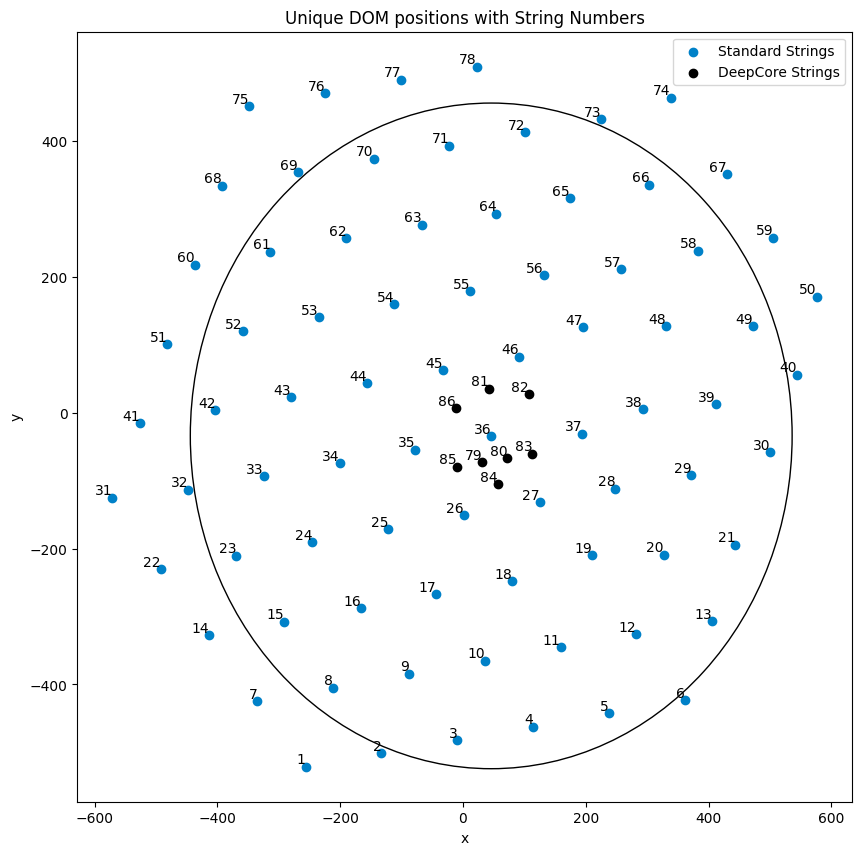

In [7]:
def plotXYpositionsWithLabels(df):
    unique_dom_xy = df.groupby(['string']).first().reset_index()
    print(f'Number of unique dom positions: {unique_dom_xy.shape[0]}')
    standardString = unique_dom_xy[unique_dom_xy['string'] < 79]
    deepCoreString = unique_dom_xy[(unique_dom_xy['string'] >= 79) & (unique_dom_xy['string'] < 87)]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(standardString['dom_x'], standardString['dom_y'], marker='o', color = custom_colors[0], label='Standard Strings')
    ax.scatter(deepCoreString['dom_x'], deepCoreString['dom_y'], marker='o', color = custom_colors[2], label='DeepCore Strings')
    
    label_doms = pd.concat([standardString, deepCoreString])
    for _, row in label_doms.iterrows():
        ax.text(row['dom_x'], row['dom_y'], str(int(row['string'])), fontsize=10, ha='right', va='bottom')

    #Draw a circle of radius 400 m from y_m: -34, x_m: 46
    circle = plt.Circle((46, -34), 490, color='black', fill=False)
    
    ax.add_artist(circle)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Unique DOM positions with String Numbers')
    ax.legend()
    
df_grid = df_splits[['string', 'dom_number', 'dom_x', 'dom_y', 'dom_z']].drop_duplicates()
plotXYpositionsWithLabels(df_grid)


       string  dom_number           x           y           z
0        90.0        47.0   57.238209  -83.559966 -292.868527
1        90.0        54.0   57.415034  -83.736791 -313.868527
2        93.0        47.0   14.341791  -80.688784 -292.991473
3        93.0        50.0   14.238209  -80.438716 -301.868527
4        13.0        19.0  405.830000 -306.380000  188.760000
...       ...         ...         ...         ...         ...
15252    93.0       121.0   14.290000  -80.563750 -601.683000
15253    23.0        60.0 -368.930000 -210.230000 -503.690000
15254    20.0        60.0  326.850000 -209.070000 -505.800000
15255    68.0        59.0 -392.380000  334.240000 -484.410000
15256     2.0        58.0 -132.800000 -501.450000 -470.110000

[15257 rows x 5 columns]


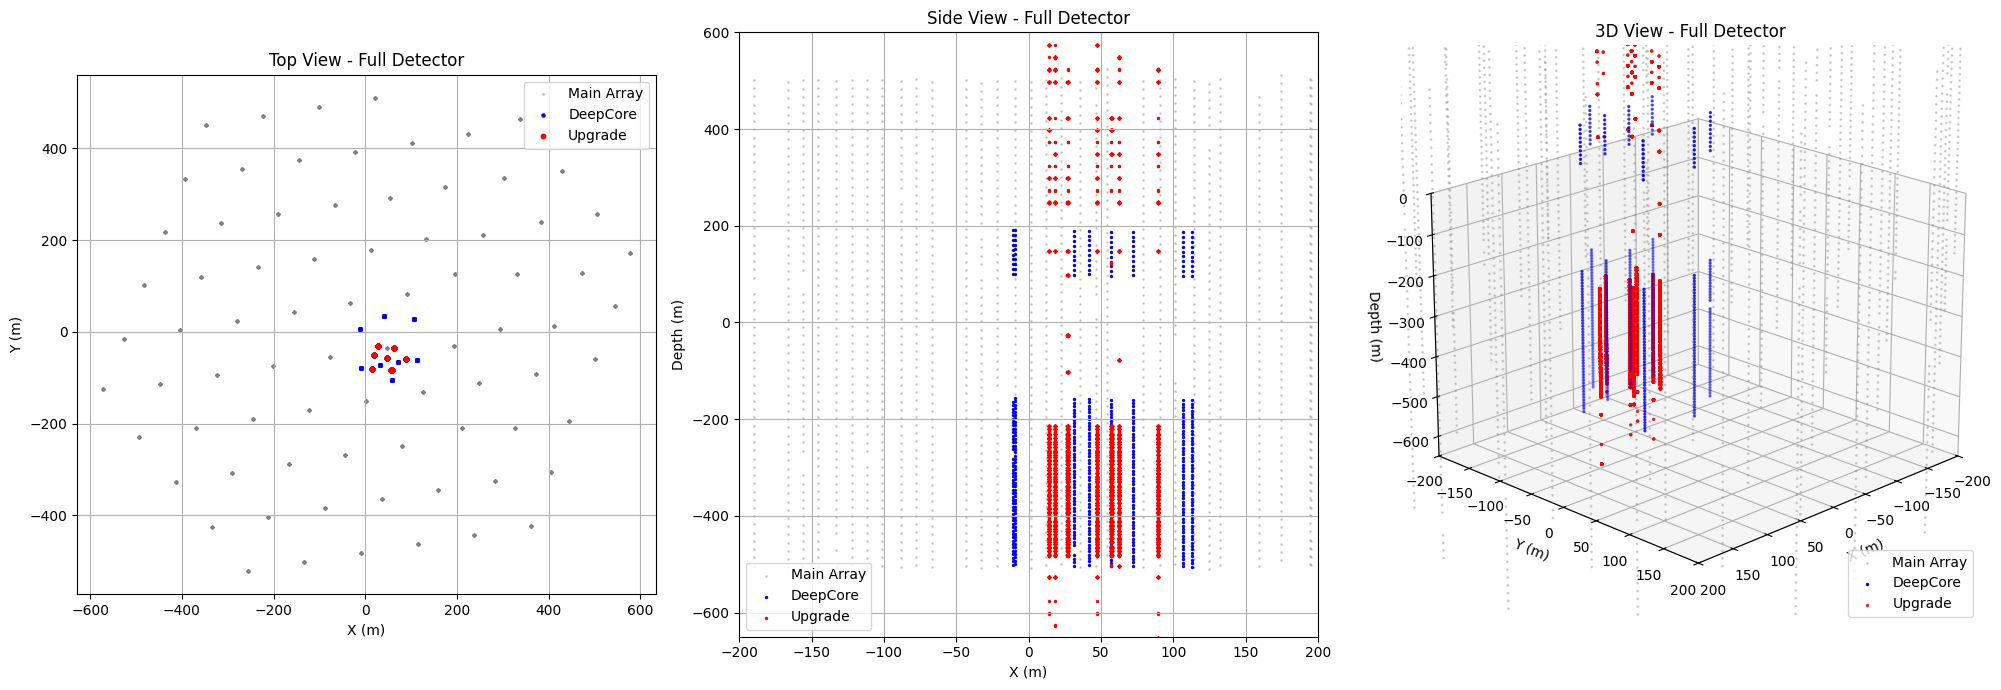


Detector Statistics:
Main Array DOMs (strings 1-78): 4564
DeepCore DOMs (strings 79-86): 475
Upgrade DOMs (strings 87+): 10218

Upgrade String Positions:

String 87.0:
- Number of DOMs: 1471
- Depth range: -482.1m to 523.3m
- Position: (27.0m, -31.2m)

String 88.0:
- Number of DOMs: 1473
- Depth range: -503.1m to 548.2m
- Position: (62.6m, -35.2m)

String 89.0:
- Number of DOMs: 1450
- Depth range: -652.1m to 523.2m
- Position: (89.3m, -59.0m)

String 90.0:
- Number of DOMs: 1353
- Depth range: -503.2m to 423.2m
- Position: (57.3m, -83.7m)

String 91.0:
- Number of DOMs: 1522
- Depth range: -602.2m to 573.2m
- Position: (47.3m, -57.0m)

String 92.0:
- Number of DOMs: 1474
- Depth range: -627.2m to 573.1m
- Position: (18.3m, -51.1m)

String 93.0:
- Number of DOMs: 1475
- Depth range: -602.2m to 573.2m
- Position: (14.3m, -80.6m)


In [6]:
def analyze_full_detector():
    # Load both geometries to compare
   # df_original = pd.read_csv(geo_file)
    df_upgrade = pd.read_csv('/groups/icecube/simon/GNN/workspace/completed.csv',
                            sep=',',
                            skiprows=1,
                            names=['string', 'dom_number', 'x', 'y', 'z'])
    print(df_upgrade)
    # Filter out very shallow DOMs for better visualization
    df_filtered = df_upgrade[df_upgrade['z'] < 600]
    # Define upgrade region
    min_depth = -700
    max_depth = 600
    # Create plots
    fig = plt.figure(figsize=(20, 7))
    # Top view
    ax1 = fig.add_subplot(131)
    # Plot strings with adjusted sizes
    main_array = df_filtered[df_filtered['string'].between(1, 78)]
    deepcore = df_filtered[df_filtered['string'].between(79, 86)]
    upgrade = df_filtered[df_filtered['string'] >= 87]
    special = df_filtered[df_filtered['string'] == 0]
    # Plot with meaningful labels and smaller points
    ax1.scatter(main_array['x'], main_array['y'], c='gray', s=2, alpha=0.3, label='Main Array')
    ax1.scatter(deepcore['x'], deepcore['y'], c='blue', s=5, label='DeepCore')
    ax1.scatter(upgrade['x'], upgrade['y'], c='red', s=10, label='Upgrade')
    if len(special) > 0:
        ax1.scatter(special['x'], special['y'], c='green', s=10, label='Special (String 0)')
    ax1.grid(True)
    ax1.set_xlabel('X (m)')
    ax1.set_ylabel('Y (m)')
    ax1.set_title('Top View - Full Detector')
    ax1.legend()
    # Set equal aspect ratio and zoom to DeepCore/Upgrade region
    ax1.set_aspect('equal')
    center_x = upgrade['x'].mean()
    center_y = upgrade['y'].mean()
    # ax1.set_xlim(center_x - 100, center_x + 100)
    # ax1.set_ylim(center_y - 100, center_y + 100)
    
    # Side view
    ax2 = fig.add_subplot(132)
    ax2.scatter(main_array['x'], main_array['z'], s=1, c='gray', alpha=0.3, label='Main Array')
    ax2.scatter(deepcore['x'], deepcore['z'], s=2, c='blue', label='DeepCore')
    ax2.scatter(upgrade['x'], upgrade['z'], s=2, c='red', label='Upgrade')
    if len(special) > 0:
        ax2.scatter(special['x'], special['z'], s=4, c='green', label='Special (String 0)')
    # Show upgrade region
    #ax2.axhspan(min_depth, max_depth, color='red', alpha=0.1, label='Upgrade region')
    ax2.grid(True)
    ax2.set_xlabel('X (m)')
    ax2.set_ylabel('Depth (m)')
    ax2.set_ylim(-650, 600)
    ax2.set_xlim(-200, 200)
    ax2.set_title('Side View - Full Detector')
    ax2.legend()
    # 3D visualization
    ax3 = fig.add_subplot(133, projection='3d')
    # Plot existing DOMs
    ax3.scatter(main_array['x'], main_array['y'], main_array['z'],
                s=1, c='gray', alpha=0.3, label='Main Array')
    ax3.scatter(deepcore['x'], deepcore['y'], deepcore['z'],
                s=2, c='blue', label='DeepCore')
    ax3.scatter(upgrade['x'], upgrade['y'], upgrade['z'],
                s=2, c='red', alpha=0.8, label='Upgrade')
    ax3.set_xlabel('X (m)')
    ax3.set_ylabel('Y (m)')
    ax3.set_zlabel('Depth (m)')
    ax3.set_title('3D View - Full Detector')
    ax3.set_zlim(-650,0)
    ax3.set_xlim(-200, 200)
    ax3.set_ylim(-200, 200)
    ax3.legend()
    # Rotate the 3D view for better visualization
    ax3.view_init(elev=20, azim=45)
    plt.tight_layout()
    plt.show()
    # Print statistics
    print("\nDetector Statistics:")
    print(f"Main Array DOMs (strings 1-78): {len(main_array)}")
    print(f"DeepCore DOMs (strings 79-86): {len(deepcore)}")
    print(f"Upgrade DOMs (strings 87+): {len(upgrade)}")
    print("\nUpgrade String Positions:")
    for string in sorted(upgrade['string'].unique()):
        string_data = upgrade[upgrade['string'] == string]
        print(f"\nString {string}:")
        print(f"- Number of DOMs: {len(string_data)}")
        print(f"- Depth range: {string_data['z'].min():.1f}m to {string_data['z'].max():.1f}m")
        print(f"- Position: ({string_data['x'].mean():.1f}m, {string_data['y'].mean():.1f}m)") 
analyze_full_detector()

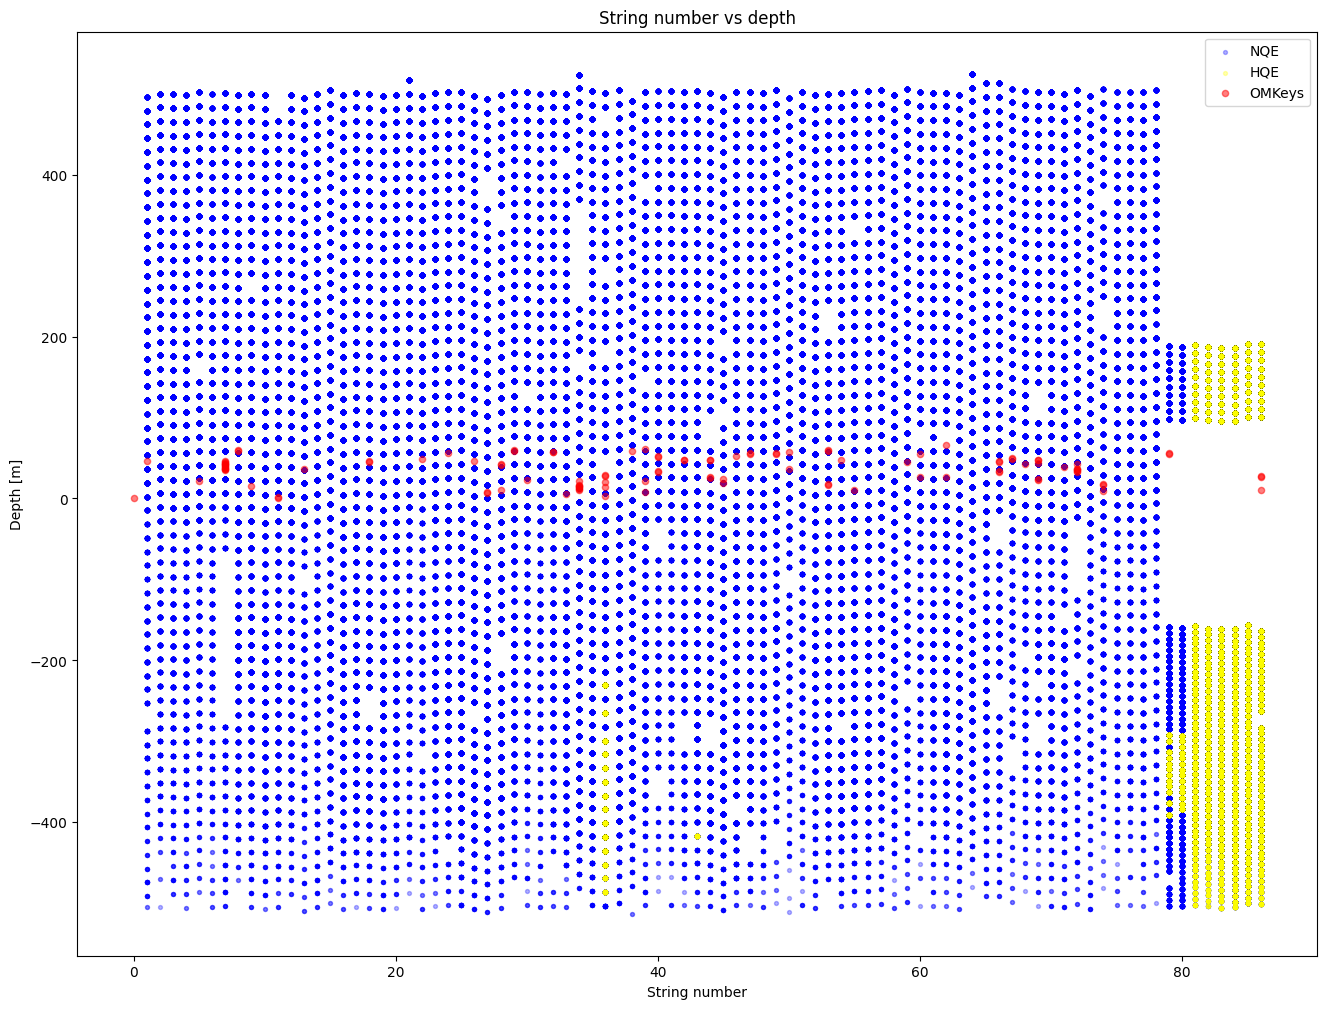

In [ ]:
# Plot string nr. vs depth (m) for strings 1-86. Mark rde = 1.35 yellow and rde = 1.0 blue

'''
[OMKey(1,46,0), OMKey(7,36,0), OMKey(7,38,0), OMKey(7,40,0), OMKey(11,2,0), OMKey(40,34,0), OMKey(53,18,0), OMKey(62,66,0), OMKey(13,36,0), OMKey(66,33,0), OMKey(72,33,0), OMKey(72,35,0), OMKey(72,37,0), OMKey(33,6,0), OMKey(71,39,0), OMKey(27,8,0), OMKey(39,8,0), OMKey(28,41,0), OMKey(28,10,0), OMKey(7,43,0), OMKey(72,43,0), OMKey(34,12,0), OMKey(7,45,0), OMKey(18,45,0), OMKey(59,45,0), OMKey(66,45,0), OMKey(34,14,0), OMKey(36,14,0), OMKey(54,47,0), OMKey(42,47,0), OMKey(44,47,0), OMKey(69,47,0), OMKey(34,16,0), OMKey(67,49,0), OMKey(74,18,0), OMKey(40,51,0), OMKey(36,20,0), OMKey(46,53,0), OMKey(34,22,0), OMKey(39,22,0), OMKey(47,55,0), OMKey(49,55,0), OMKey(60,55,0), OMKey(79,55,0), OMKey(45,24,0), OMKey(69,24,0), OMKey(32,57,0), OMKey(44,26,0), OMKey(60,26,0), OMKey(62,26,0), OMKey(8,59,0), OMKey(29,59,0), OMKey(38,59,0), OMKey(53,59,0), OMKey(36,28,0), OMKey(86,28,0), OMKey(39,61,0), OMKey(0,1,0), OMKey(5,21,0), OMKey(7,35,0), OMKey(7,37,0), OMKey(7,39,0), OMKey(7,41,0), OMKey(11,1,0), OMKey(22,49,0), OMKey(34,17,0), OMKey(40,33,0), OMKey(66,34,0), OMKey(72,34,0), OMKey(36,3,0), OMKey(50,36,0), OMKey(72,36,0), OMKey(27,7,0), OMKey(74,9,0), OMKey(7,42,0), OMKey(28,42,0), OMKey(68,42,0), OMKey(34,11,0), OMKey(55,11,0), OMKey(86,11,0), OMKey(7,44,0), OMKey(69,44,0), OMKey(34,13,0), OMKey(7,46,0), OMKey(18,46,0), OMKey(26,46,0), OMKey(66,46,0), OMKey(34,15,0), OMKey(9,15,0), OMKey(44,48,0), OMKey(42,48,0), OMKey(69,48,0), OMKey(53,17,0), OMKey(74,17,0), OMKey(67,50,0), OMKey(45,19,0), OMKey(40,52,0), OMKey(30,23,0), OMKey(69,23,0), OMKey(24,56,0), OMKey(47,56,0), OMKey(49,56,0), OMKey(79,56,0), OMKey(44,25,0), OMKey(32,58,0), OMKey(50,58,0), OMKey(86,27,0), OMKey(8,60,0), OMKey(29,60,0), OMKey(53,60,0), OMKey(36,29,0)]

'''

def plotStringDepth(df):
    #Filter out the strings 1-86
    df = df[df['string'] < 87]
    fig, ax = plt.subplots(figsize=(16, 12))
    ax.scatter(df['string'], df['dom_z'], c='blue',s=8,  alpha=0.3, label='NQE', marker='o')
    ax.scatter(df[df['rde'] == 1.35]['string'], df[df['rde'] == 1.35]['dom_z'], c='yellow', s=8, alpha=0.3, label='HQE', marker='o')
    
    
    ax.set_xlabel('String number')
    ax.set_ylabel('Depth [m]')
    ax.set_title('String number vs depth')
    ax.legend()
    plt.show()
    
plotStringDepth(df_splits)


In [ ]:
'''
[OMKey(1,46,0), OMKey(7,36,0), OMKey(7,38,0), OMKey(7,40,0), OMKey(11,2,0), OMKey(40,34,0), OMKey(53,18,0), OMKey(62,66,0), OMKey(66,34,0), OMKey(66,33,0), OMKey(33,6,0), OMKey(71,39,0), OMKey(27,8,0), OMKey(28,41,0), OMKey(34,12,0), OMKey(7,45,0), OMKey(18,45,0), OMKey(59,45,0), OMKey(66,45,0), OMKey(34,14,0), OMKey(54,47,0), OMKey(42,47,0), OMKey(44,47,0), OMKey(69,47,0), OMKey(67,49,0), OMKey(74,18,0), OMKey(40,51,0), OMKey(34,22,0), OMKey(39,22,0), OMKey(47,55,0), OMKey(49,55,0), OMKey(60,55,0), OMKey(79,55,0), OMKey(69,24,0), OMKey(32,57,0), OMKey(44,26,0), OMKey(8,59,0), OMKey(29,59,0), OMKey(38,59,0), OMKey(86,28,0), OMKey(39,61,0), OMKey(0,1,0), OMKey(5,21,0), OMKey(7,35,0), OMKey(7,37,0), OMKey(7,39,0), OMKey(7,41,0), OMKey(11,1,0), OMKey(22,49,0), OMKey(34,17,0), OMKey(40,33,0), OMKey(13,36,0), OMKey(50,36,0), OMKey(27,7,0), OMKey(74,9,0), OMKey(7,42,0), OMKey(28,42,0), OMKey(68,42,0), OMKey(34,11,0), OMKey(7,44,0), OMKey(69,44,0), OMKey(34,13,0), OMKey(7,46,0), OMKey(18,46,0), OMKey(26,46,0), OMKey(66,46,0), OMKey(34,15,0), OMKey(9,15,0), OMKey(69,48,0), OMKey(44,48,0), OMKey(42,48,0), OMKey(53,17,0), OMKey(74,17,0), OMKey(67,50,0), OMKey(45,19,0), OMKey(40,52,0), OMKey(30,23,0), OMKey(69,23,0), OMKey(24,56,0), OMKey(47,56,0), OMKey(49,56,0), OMKey(79,56,0), OMKey(44,25,0), OMKey(32,58,0), OMKey(86,27,0), OMKey(8,60,0), OMKey(29,60,0)]
'''

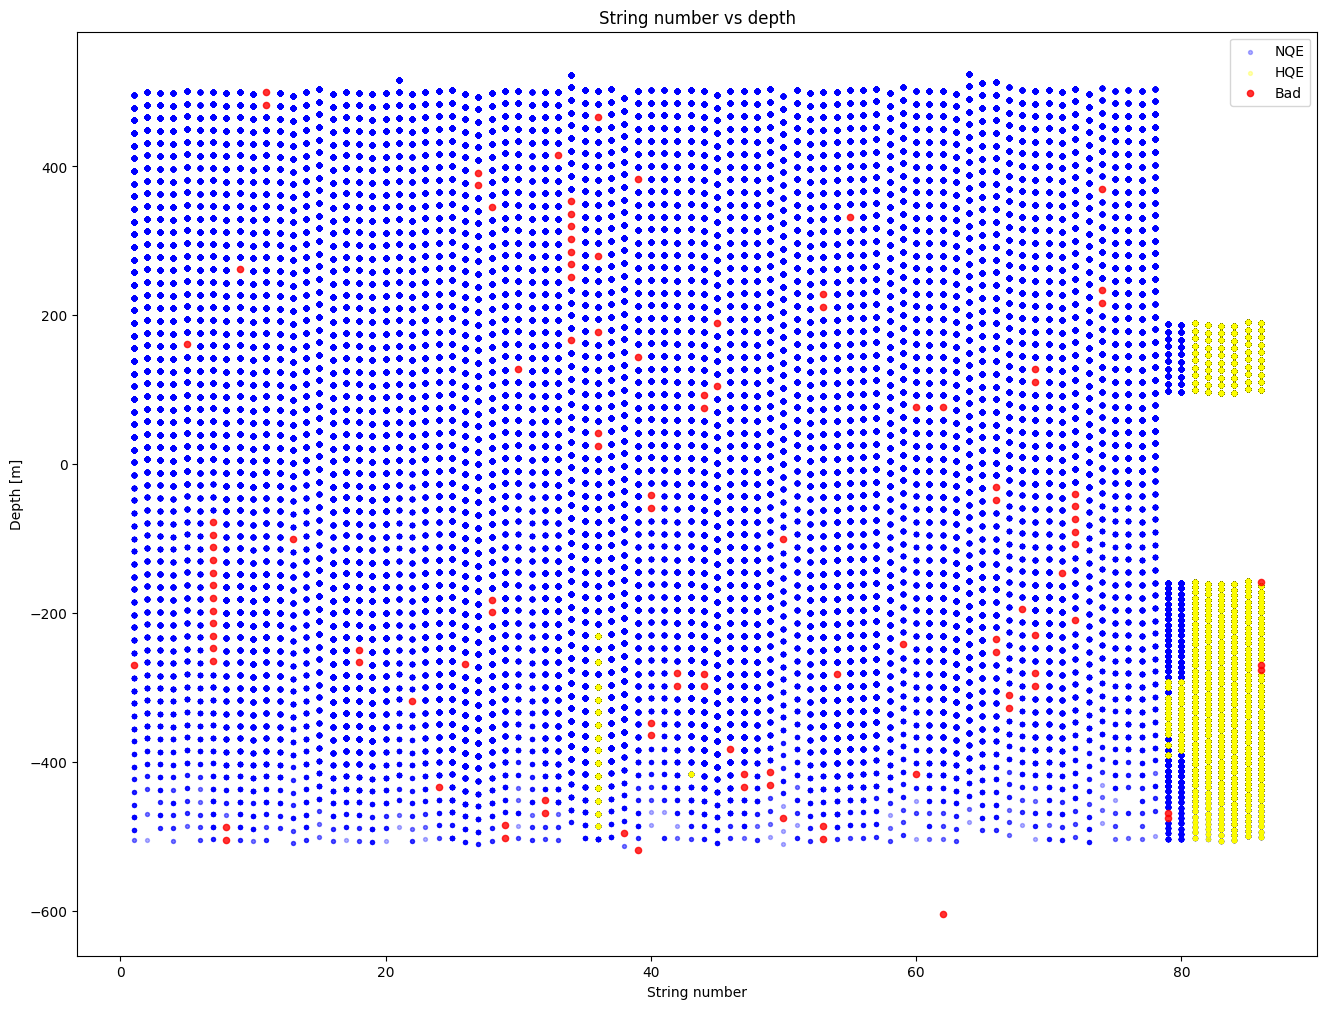

In [28]:
def get_depth_for_omkey_fixed(s, dom, df):
    """
    For a given OMKey defined by (s, dom) on a specific string s,
    infer the DOM's depth using fixed spacing:
      - 17 m for strings below 79
      - 7 m for strings 79 to 86
      
    If the DOM is present in df for that string, return its measured depth.
    Otherwise, use the depth of the lowest available DOM on that string as a base.
    """
    # Get all available data for string s
    string_df = df[df['string'] == s]
    if string_df.empty:
        return None  # no data available for this string

    # If the requested DOM already exists, return its depth.
    if dom in string_df['dom_number'].values:
        return string_df[string_df['dom_number'] == dom]['dom_z'].mean()
    
    # Determine fixed spacing based on string number.
    if s < 79:
        spacing = 17
        base_dom = string_df['dom_number'].min()
   
        base_depth = string_df[string_df['dom_number'] == base_dom]['dom_z'].mean()
        inferred_depth = base_depth - (dom - base_dom) * spacing
    else:
        spacing = 7
        base_dom = string_df['dom_number'].max()
        base_depth = string_df[string_df['dom_number'] == base_dom]['dom_z'].mean()
        inferred_depth = base_depth - (dom - base_dom) * spacing

    # Use the smallest available DOM on that string as the base.

    #print(f"Base depth: {base_depth}")
    # Compute the inferred depth using the fixed spacing.
    return inferred_depth

def plotStringDepth(df, omkeys):
    """
    Plot the available data from df and overlay the OMKey positions (with inferred depths)
    in red. Uses fixed spacing: 17 m for strings below 79 and 7 m for strings 79-86.
    
    Parameters:
      df: DataFrame containing at least the columns 'string', 'dom_number', 'dom_z', and 'rde'.
      omkeys: A list of OMKey tuples, e.g. (string, dom, 0)
    """
    # Only consider strings with number < 87.
    df = df[df['string'] < 87]
    
    fig, ax = plt.subplots(figsize=(16, 12))
    
    # Plot existing points.
    ax.scatter(df['string'], df['dom_z'], c='blue', s=8, alpha=0.3, label='NQE', marker='o')
    ax.scatter(df[df['rde'] == 1.35]['string'], df[df['rde'] == 1.35]['dom_z'],
               c='yellow', s=8, alpha=0.3, label='HQE', marker='o')
    
    # Loop over the OMKeys, computing an inferred depth when missing.
    om_x, om_y = [], []
    for om in omkeys:
        s, dom = om  # OMKey assumed as (string, dom, 0)
        if s >= 87:
            continue  # Skip strings outside our plotting range
        inferred_depth = get_depth_for_omkey_fixed(s, dom, df)
        if inferred_depth is not None:
            om_x.append(s)
            om_y.append(inferred_depth)
    # Plot the inferred OMKey positions.
    ax.scatter(om_x, om_y, c='red', s=20, alpha=0.8, label='Bad', marker='o')
    
    ax.set_xlabel('String number')
    #ax.set_ylim(-600, 100)
    ax.set_ylabel('Depth [m]')
    ax.set_title('String number vs depth')
    ax.legend()
    plt.show()


# Example list of OMKeys (each represented as a tuple: (string, dom, 0))
omkeys = [
        (1,46), (7,36), (7,38), (7,40), (11,2), (40,34), (53,18), (62,66), (13,36), (66,33), (72,33),
        (72,35), (72,37), (33,6), (71,39), (27,8), (39,8), (28,41), (28,10), (7,43), (72,43), (34,12),
        (7,45), (18,45), (59,45), (66,45), (34,14), (36,14), (54,47), (42,47), (44,47), (69,47), (34,16),
        (67,49), (74,18), (40,51), (36,20), (46,53), (34,22), (39,22), (47,55), (49,55), (60,55), (79,55),
        (45,24), (69,24), (32,57), (44,26), (60,26), (62,26), (8,59), (29,59), (38,59), (53,59), (36,28),
        (86,28), (39,61), (0,1), (5,21), (7,35), (7,37), (7,39), (7,41), (11,1), (22,49), (34,17), (40,33),
        (66,34), (72,34), (36,3), (50,36), (72,36), (27,7), (74,9), (7,42), (28,42), (68,42), (34,11),
        (55,11), (86,11), (7,44), (69,44), (34,13), (7,46), (18,46), (26,46), (66,46), (34,15), (9,15),
        (44,48), (42,48), (69,48), (53,17), (74,17), (67,50), (45,19), (40,52), (30,23), (69,23), (24,56),
        (47,56), (49,56), (79,56), (44,25), (32,58), (50,58), (86,27), (8,60), (29,60), (53,60), (36,29)
        ]

# Call the plotting function with your DataFrame (df_splits) and the OMKeys list
plotStringDepth(df_splits, omkeys)


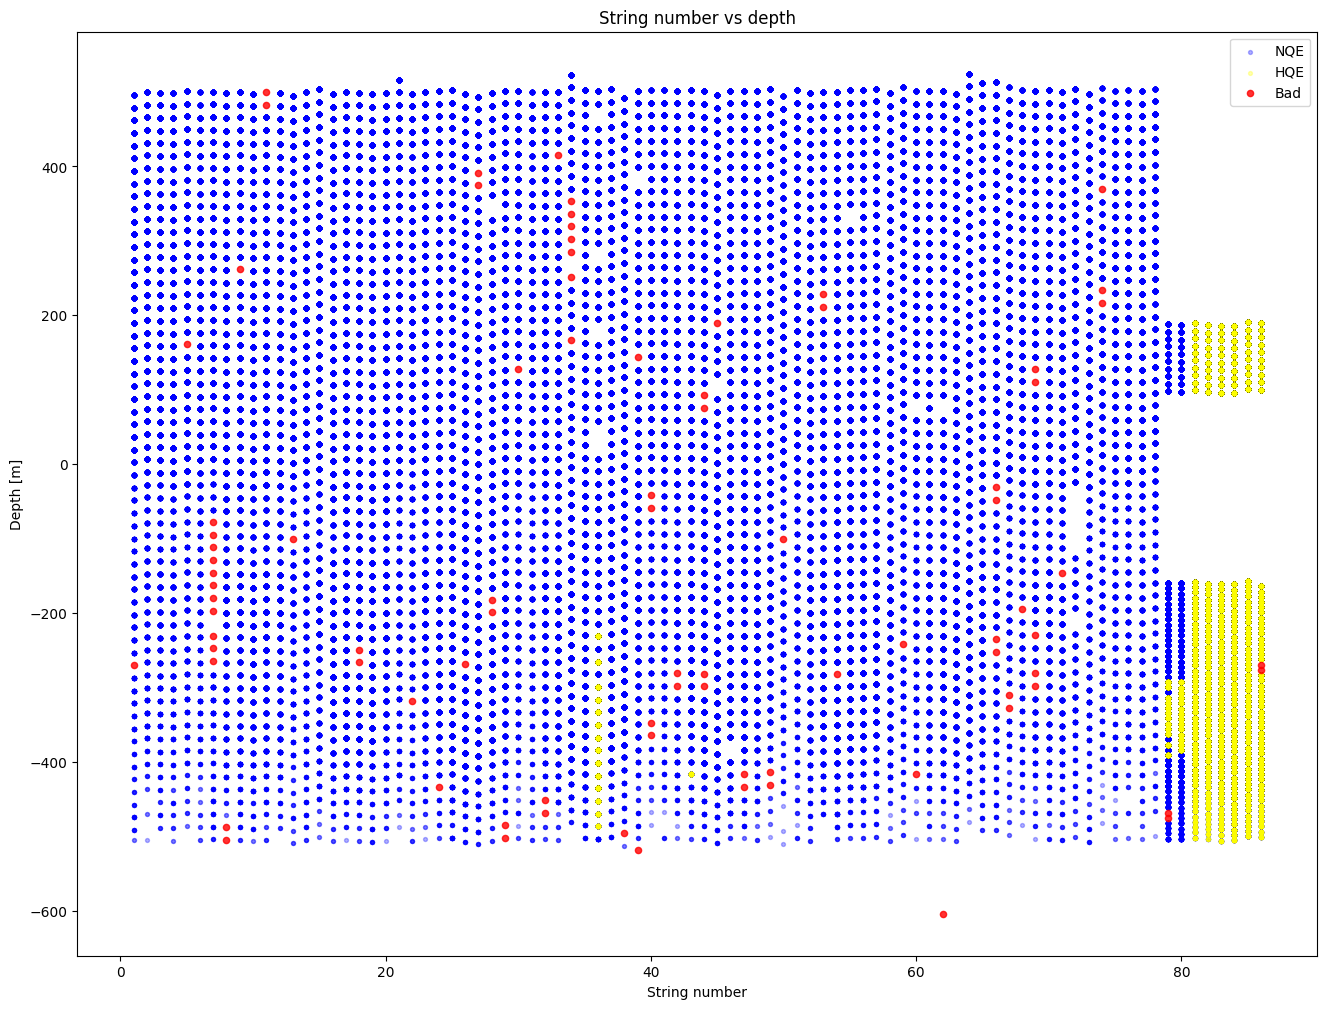

In [29]:
omkeys_SLC = [
    (1, 46),
    (7, 36),
    (7, 38),
    (7, 40),
    (11, 2),
    (40, 34),
    (53, 18),
    (62, 66),
    (66, 34),
    (66, 33),
    (33, 6),
    (71, 39),
    (27, 8),
    (28, 41),
    (34, 12),
    (7, 45),
    (18, 45),
    (59, 45),
    (66, 45),
    (34, 14),
    (54, 47),
    (42, 47),
    (44, 47),
    (69, 47),
    (67, 49),
    (74, 18),
    (40, 51),
    (34, 22),
    (39, 22),
    (47, 55),
    (49, 55),
    (60, 55),
    (79, 55),
    (69, 24),
    (32, 57),
    (44, 26),
    (8, 59),
    (29, 59),
    (38, 59),
    (86, 28),
    (39, 61),
    (0, 1),
    (5, 21),
    (7, 35),
    (7, 37),
    (7, 39),
    (7, 41),
    (11, 1),
    (22, 49),
    (34, 17),
    (40, 33),
    (13, 36),
    (50, 36),
    (27, 7),
    (74, 9),
    (7, 42),
    (28, 42),
    (68, 42),
    (34, 11),
    (7, 44),
    (69, 44),
    (34, 13),
    (7, 46),
    (18, 46),
    (26, 46),
    (66, 46),
    (34, 15),
    (9, 15),
    (69, 48),
    (44, 48),
    (42, 48),
    (53, 17),
    (74, 17),
    (67, 50),
    (45, 19),
    (40, 52),
    (30, 23),
    (69, 23),
    (24, 56),
    (47, 56),
    (49, 56),
    (79, 56),
    (44, 25),
    (32, 58),
    (86, 27),
    (8, 60),
    (29, 60)
]

plotStringDepth(df_splits, omkeys_SLC)

In [36]:

def calculate_photon_distance(P_DOM, P1, P2, theta_Cher):
    """
    Calculate the distance from the Cherenkov emission point to the DOM.

    Parameters:
    - P_DOM: Position of the DOM (3D vector).
    - P1: Start point of the muon (3D vector).
    - P2: End point of the muon (3D vector).
    - theta_Cher: Cherenkov angle in radians.

    Returns:
    - photon_distance: Distance from P_Cherenkov to P_DOM.
    - P_Cherenkov: Position of the Cherenkov emission point.
    """
    # Calculate the muon track direction vector and its length
    muon_dir = P2 - P1
    muon_length = np.linalg.norm(muon_dir)
    
    # Normalize the muon direction vector
    muon_dir_unit = muon_dir / muon_length
    
    # Calculate vector from P2 to P_DOM and projection length `n` on muon direction
    vec_P1_DOM = P1- P_DOM
    projection_length = np.dot(vec_P1_DOM, muon_dir_unit)  # Projection of P2->DOM on muon_dir
    
    # Calculate P_DOCA using the normalized projection
    P_DOCA = P1 - projection_length * muon_dir_unit  # Closest point on the track
    
    # Distance from P_DOCA to P_DOM
    d_DOCA = np.linalg.norm(P_DOM - P_DOCA)
    
    # Distance from P_DOCA to P_Cherenkov
    distance_to_P_Cherenkov = d_DOCA * np.tan(theta_Cher)
    
    # Calculate `r` in terms of muon direction units
    r = distance_to_P_Cherenkov / muon_length
    
    # Calculate P_Cherenkov position
    P_Cherenkov = P_DOCA - r * muon_dir
    
    # Photon distance from P_Cherenkov to P_DOM
    photon_distance = np.linalg.norm(P_DOM - P_Cherenkov)
    
    return photon_distance, P_Cherenkov

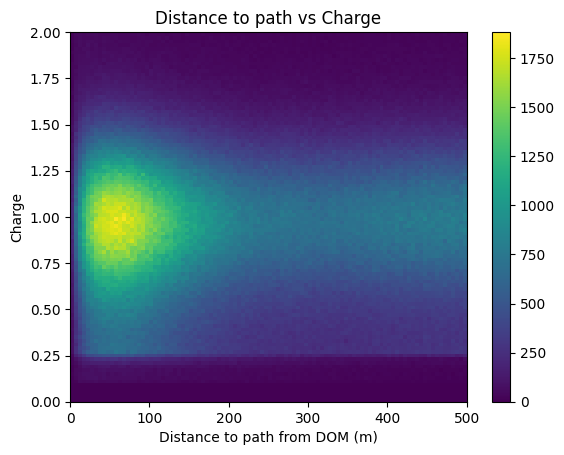

count    6.777049e+06
mean     3.843775e+02
std      2.693467e+02
min      6.045418e-02
25%      1.276412e+02
50%      3.576560e+02
75%      6.160474e+02
max      1.351318e+03
Name: distance_to_path, dtype: float64


In [37]:
def calculate_path(df):
    x_end = df['position_x']
    y_end = df['position_y']
    z_end = df['position_z']
    zenith = df['zenith']
    azimuth = df['azimuth']
    track_length = df['track_length']
    
    x_start = x + track_length * np.sin(zenith) * np.cos(azimuth)
    y_start = y + track_length * np.sin(zenith) * np.sin(azimuth)
    z_start = z + track_length * np.cos(zenith)
    return x_start, y_start, z_start
# Merge df_splits with necessary columns from df_truth
df_merged = pd.merge(df_splits, df_truth[['event_no', 'position_x', 'position_y', 'position_z', 'zenith', 'azimuth', 'track_length']], on='event_no')

# Vectorized function to calculate distance of DOM from the particle path
def calculate_distance_to_path_vectorized(df):
    # Coordinates of DOMs
    x_dom = df['dom_x'].values
    y_dom = df['dom_y'].values
    z_dom = df['dom_z'].values
    
    # Coordinates of the particle path start and end
    x_end = df['position_x'].values  # End position directly from data
    y_end = df['position_y'].values
    z_end = df['position_z'].values
    
    # Calculate start positions directly within the function
    start_positions = df.apply(lambda row: calculate_start_position(row), axis=1)
    x_start, y_start, z_start = zip(*start_positions)
    x_start, y_start, z_start = np.array(x_start), np.array(y_start), np.array(z_start)

    # Vectors along the path and to the DOM
    path_vec = np.vstack([x_end - x_start, y_end - y_start, z_end - z_start]).T
    dom_vec = np.vstack([x_dom - x_start, y_dom - y_start, z_dom - z_start]).T
    
    # Length and unit vector along the path
    path_len = np.linalg.norm(path_vec, axis=1)  # Length of the path
    path_unit_vec = path_vec / path_len[:, np.newaxis]  # Unit vector along the path
    
    # Scalar projection to find the nearest point on the path to the DOM
    t = np.einsum('ij,ij->i', dom_vec, path_unit_vec) / path_len
    t = np.clip(t, 0, 1)  # Ensure t is between 0 and 1
    
    # Nearest points on the path
    nearest_points = path_vec * t[:, np.newaxis]
    
    # Distance vector between DOM and nearest points on the path
    distance_vec = dom_vec - nearest_points
    distance_to_path = np.linalg.norm(distance_vec, axis=1)
    
    return distance_to_path

# Apply the vectorized distance calculation
df_merged['distance_to_path'] = calculate_distance_to_path_vectorized(df_merged)

# Plot the 2D histogram of distance to path vs charge
plt.hist2d(df_merged['distance_to_path'], df_merged['charge'], bins=100, cmap='viridis', range=[[0, 500], [0, 2]])
plt.colorbar()
plt.xlabel('Distance to path from DOM (m)')
plt.ylabel('Charge')
plt.title('Distance to path vs Charge')
plt.show()
print(df_merged['distance_to_path'].describe())

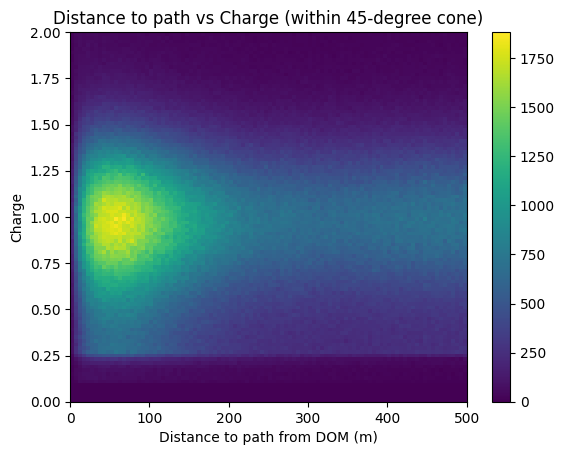

In [40]:

# Vectorized function to calculate the distance of DOMs from the particle path and apply the 45-degree cone check
def calculate_distance_to_path_with_cone(df):
    # Coordinates of DOMs
    x_dom = df['dom_x'].values
    y_dom = df['dom_y'].values
    z_dom = df['dom_z'].values
    
    # Coordinates of the particle path start and end
    x_end = df['position_x'].values  # End position directly from data
    y_end = df['position_y'].values
    z_end = df['position_z'].values
    
    # Calculate start positions directly within the function
    start_positions = df.apply(lambda row: calculate_start_position(row), axis=1)
    x_start, y_start, z_start = zip(*start_positions)
    x_start, y_start, z_start = np.array(x_start), np.array(y_start), np.array(z_start)

    # Vectors along the path and to the DOM
    path_vec = np.vstack([x_end - x_start, y_end - y_start, z_end - z_start]).T
    dom_vec = np.vstack([x_dom - x_start, y_dom - y_start, z_dom - z_start]).T
    
    # Length and unit vector along the path
    path_len = np.linalg.norm(path_vec, axis=1)  # Length of the path
    path_unit_vec = path_vec / path_len[:, np.newaxis]  # Unit vector along the path
    
    # Scalar projection to find the nearest point on the path to the DOM
    t = np.einsum('ij,ij->i', dom_vec, path_unit_vec) / path_len
    t = np.clip(t, 0, 1)  # Ensure t is between 0 and 1
    
    # Nearest points on the path
    nearest_points = path_vec * t[:, np.newaxis]
    
    # Distance vector between DOM and nearest points on the path
    distance_vec = dom_vec - nearest_points
    distance_to_path = np.linalg.norm(distance_vec, axis=1)
    
    # Calculate the angle between the path vector and the vector from the path start to the DOM
    dom_unit_vec = dom_vec / np.linalg.norm(dom_vec, axis=1)[:, np.newaxis]  # Unit vector from path start to DOM
    angles = np.arccos(np.clip(np.einsum('ij,ij->i', path_unit_vec, dom_unit_vec), -1.0, 1.0))  # Angle in radians
    
    # Filter distances by the 45-degree cone (within pi/4 radians)
    distance_to_path_cone = np.where(angles <= np.pi / 4, distance_to_path, np.nan)  # DOMs outside the cone get NaN
    
    return distance_to_path_cone

# Apply the vectorized distance function with cone check
df_merged['distance_to_path_cone'] = calculate_distance_to_path_with_cone(df_merged)

# Plot the result, excluding NaN distances
plt.hist2d(df_merged['distance_to_path_cone'], df_merged['charge'], bins=100, cmap='viridis', range=[[0, 500], [0, 2]])
plt.colorbar()
plt.xlabel('Distance to path from DOM (m)')
plt.ylabel('Charge')
plt.title('Distance to path vs Charge (within 45-degree cone)')
plt.show()


/groups/icecube/simon/Icecube/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


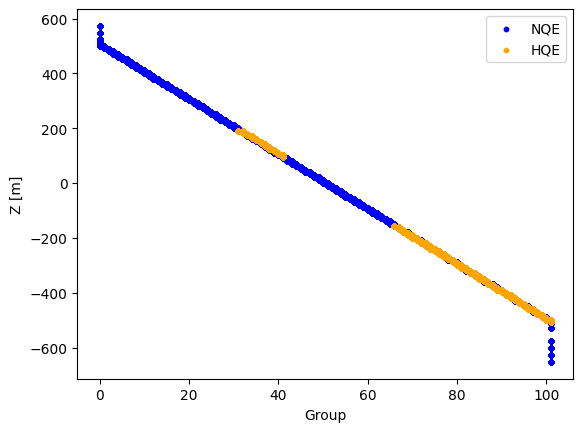

In [28]:
import matplotlib.pyplot as plt

# Define depth bins
bins = np.arange(501, -501, -10)  # Adjusted for downward depth

# Calculate depth bins and assign to new columns in df_splits  
df_splits['depth_bins'] = np.digitize(df_splits['dom_z'], bins)

# Separate data based on dom_eff
nqe_data = df_splits[df_splits['rde'] == 1.0]
hqe_data = df_splits[df_splits['rde'] == 1.35]

# Plot depth vs group index for each dom_eff
plt.scatter(nqe_data['depth_bins'], nqe_data['dom_z'], color='blue', label='NQE', s=10)
plt.scatter(hqe_data['depth_bins'], hqe_data['dom_z'], color='orange', label='HQE', s=10)

# Add labels and legend
plt.xlabel('Group')
plt.ylabel('Z [m]')
plt.legend()
plt.show()


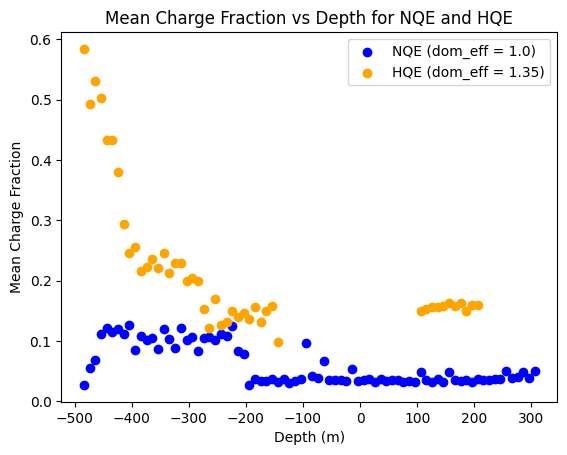

Mean Charge Fraction Ratio (HQE/NQE):
2.182480465978785


In [31]:
# Define depth bins from 300 m to -500 m with 10 m intervals
bins = np.arange(301, -501, -10)
max_depth, min_depth = 300, -500
# Filter data to keep only DOMs within the specified depth range
df_splits = df_splits[(df_splits['dom_z'] <= max_depth) & (df_splits['dom_z'] >= min_depth)]

# Assign depth bins to the filtered data
df_splits['depth_bin'] = np.digitize(df_splits['dom_z'], bins)

# Filter the data for NQE (dom_eff = 1.0) and HQE (dom_eff = 1.35)
nqe_data = df_splits[df_splits['rde'] == 1.0]
hqe_data = df_splits[df_splits['rde'] == 1.35]

# Function to calculate mean charge fraction per depth bin
def calculate_mean_charge_fraction(data):
    # Calculate total charge per event
    total_charge_per_event = data.groupby('event_no')['charge'].sum()
    
    # Calculate the charge per depth bin per event
    charge_per_depth_bin = data.groupby(['event_no', 'depth_bin'])['charge'].sum()
    
    # Calculate the fraction of charge at each depth bin relative to the total event charge
    charge_fraction_per_depth_bin = charge_per_depth_bin / total_charge_per_event
    
    # Calculate the mean charge fraction per depth bin across all events
    mean_charge_fraction_per_depth_bin = charge_fraction_per_depth_bin.groupby('depth_bin').mean()
    return mean_charge_fraction_per_depth_bin

# Calculate mean charge fraction per depth bin for NQE and HQE
mean_charge_fraction_nqe = calculate_mean_charge_fraction(nqe_data)
mean_charge_fraction_hqe = calculate_mean_charge_fraction(hqe_data)

# Adjust the depth bin centers for plotting
depth_bin_centers = bins[:-1] + 5  # Centers each bin at the midpoint (e.g., 295 for [300, 290])

# Ensure indices align with available depth_bin_centers
valid_indices_nqe = mean_charge_fraction_nqe.index[mean_charge_fraction_nqe.index <= len(depth_bin_centers)]
valid_indices_hqe = mean_charge_fraction_hqe.index[mean_charge_fraction_hqe.index <= len(depth_bin_centers)]

# Plot the mean charge fraction vs depth for NQE and HQE
plt.scatter(depth_bin_centers[valid_indices_nqe - 1], mean_charge_fraction_nqe.loc[valid_indices_nqe], color='blue', label='NQE (dom_eff = 1.0)')
plt.scatter(depth_bin_centers[valid_indices_hqe - 1], mean_charge_fraction_hqe.loc[valid_indices_hqe], color='orange', label='HQE (dom_eff = 1.35)')

plt.xlabel('Depth (m)')
plt.ylabel('Mean Charge Fraction')
plt.title('Mean Charge Fraction vs Depth for NQE and HQE')
plt.legend()
plt.show()

# Divide the mean charge fraction for HQE by the mean charge fraction for NQE
mean_charge_fraction_ratio = np.sum(mean_charge_fraction_hqe) / np.sum(mean_charge_fraction_nqe)
print(f"Mean Charge Fraction Ratio (HQE/NQE):\n{mean_charge_fraction_ratio}") 

In [11]:
def calculate_dom_distances(dom_positions, P1, P2):
    # Calculate muon direction vector and normalize it
    muon_dir = P2 - P1
    muon_dir_unit = muon_dir / np.linalg.norm(muon_dir)
    
    # Calculate the projection length of each DOM onto the muon track
    vec_P1_DOM = dom_positions - P1
    projection_lengths = np.dot(vec_P1_DOM, muon_dir_unit)
    P_DOCA = P1 + np.outer(projection_lengths, muon_dir_unit)
    
    # Calculate DOM distances to the track
    dom_distances = np.linalg.norm(dom_positions - P_DOCA, axis=1)
    return dom_distances


Monitor values for depth bins: {-500: 0.9618711577994483, -490: 0.9764332638518645, -480: 0.9848669247678769, -470: 1.004488667684548, -460: 1.0025241743895628, -450: 1.0065753415873184, -440: 0.9993960231422899, -430: 1.0005843108525099, -420: 0.9964136075734561, -410: 0.997416022887206, -400: 1.0006056721990013, -390: 0.9967249874017379, -380: 1.0019695476287915, -370: 0.9931624264501023, -360: 0.9991018760750312, -350: 1.0044288172126652, -340: 0.9981114563566668, -330: 0.999370433910405, -320: 0.9987331080336531, -310: 1.0056239711720005, -300: 0.9951189718726609, -290: 1.0009352585910696, -280: 1.0019250886648017, -270: 0.9997149326732068, -260: 1.0082761584555062, -250: 1.006007488964992, -240: 1.0057803270549088, -230: 1.0087093178828135, -220: 0.9961228712275005, -210: 0.9424661973810569, -200: 0.9545912851165583, -190: 0.938207199898265, -180: 0.9451571601209137, -170: 0.9561893115885536, -160: 0.9615001527761872, -150: 0.9608462983369828, -140: 0.9736827492713929, -130: 0.96

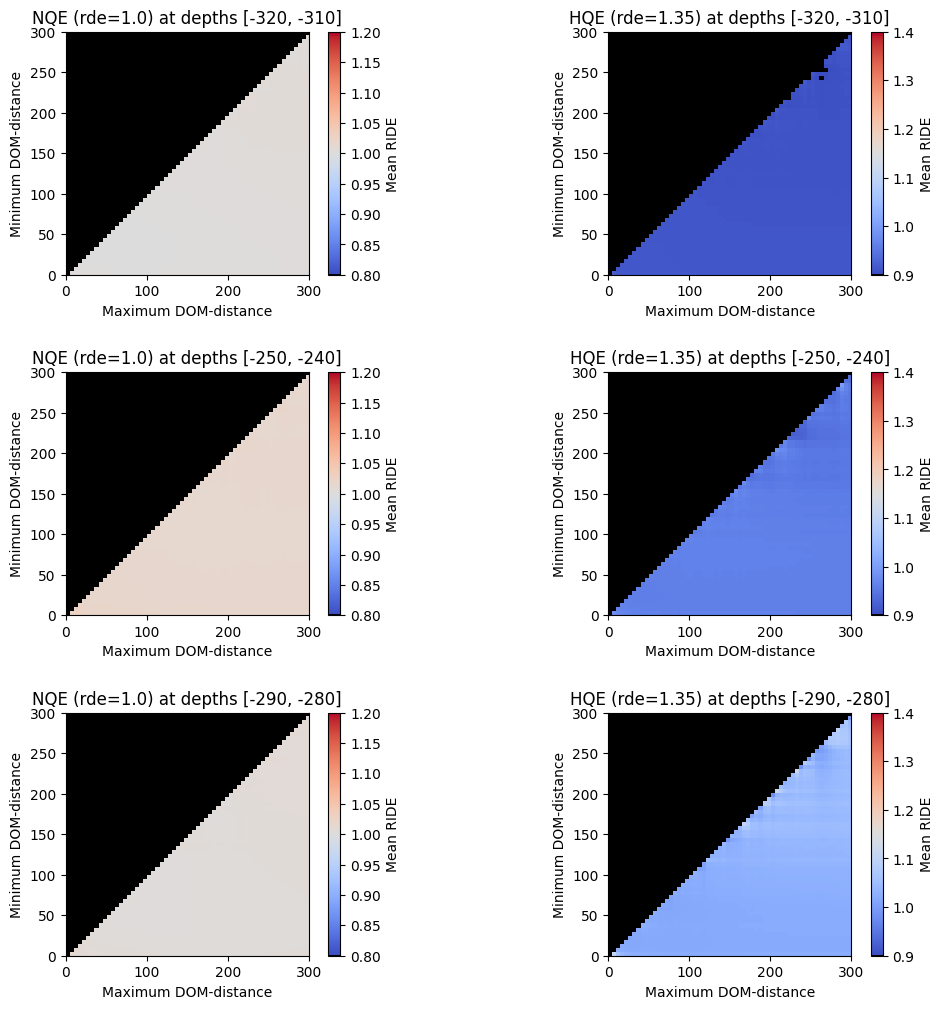

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define continuous 10-meter depth bins from -500m to 0m
all_depth_bins = np.arange(-500, 0, 10)
df_splits['depth_bin'] = pd.cut(df_splits['dom_z'], bins=all_depth_bins, labels=all_depth_bins[:-1])
muon_track_length = df_truth['track_length'].values[0]

# Initialize the 'RIDE' column with NaN values
df_splits['RIDE'] = np.nan

# Define specific depth ranges for focused plots
focus_depth_bins = [(-320, -310), (-250, -240), (-290, -280)]

# Define finer intervals for min and max distances
min_distance_values = np.arange(0, 300, 5)
max_distance_values = np.arange(0, 300, 5)

# Separate data for NQE and HQE based on 'rde' values
efficiency_groups = {
    "NQE (rde=1.0)": df_splits[df_splits['rde'] == 1.0], 
    "HQE (rde=1.35)": df_splits[df_splits['rde'] == 1.35]
}
# Pre-calculate monitor values **only** for the depth bins of interest
monitor_values = {}
grouped_nqe = efficiency_groups["NQE (rde=1.0)"].groupby('depth_bin', observed=False)

for bin, group in grouped_nqe:
    dom_indices_nqe = np.unique(group[['dom_x', 'dom_y', 'dom_z']].values, axis=0, return_inverse=True)[1]
    
    # Calculate total charge and hits per DOM
    total_charge_per_dom_nqe = np.bincount(dom_indices_nqe, weights=group['charge'].values)
    hit_count_per_dom_nqe = np.bincount(dom_indices_nqe)
    
    # Calculate average charge per hit per DOM
    avg_charge_per_hit_nqe = total_charge_per_dom_nqe / hit_count_per_dom_nqe
    
    # Store the median value for the current depth bin in the monitor_values dictionary
    if len(avg_charge_per_hit_nqe) > 0:
        monitor_values[bin] = np.median(avg_charge_per_hit_nqe)
    else:
        monitor_values[bin] = 0
            
print(f"\nMonitor values for depth bins: {monitor_values}")
# Map monitor values to all DOMs and calculate RIDE values for only the focus depth bins
dom_positions = df_splits[['dom_x', 'dom_y', 'dom_z']].values
charges = df_splits['charge'].values
depth_bins = df_splits['depth_bin'].values

unique_doms, dom_indices = np.unique(dom_positions, axis=0, return_inverse=True)
avg_charge_per_hit = np.bincount(dom_indices, weights=charges) / np.bincount(dom_indices)

# Only map monitor values for DOMs that are within the focus depth bins
monitor_per_dom = np.array([monitor_values.get(float(bin), np.nan) for bin in depth_bins[dom_indices[:len(unique_doms)]]])

valid_monitor_mask = (monitor_per_dom != 0) & (~np.isnan(monitor_per_dom))
ride_values = np.full_like(avg_charge_per_hit, np.nan)
ride_values[valid_monitor_mask] = avg_charge_per_hit[valid_monitor_mask] / monitor_per_dom[valid_monitor_mask]

df_splits['RIDE'] = ride_values[dom_indices]
efficiency_groups = {
    "NQE (rde=1.0)": df_splits[df_splits['rde'] == 1.0], 
    "HQE (rde=1.35)": df_splits[df_splits['rde'] == 1.35]
}

for focus_depth_bin in focus_depth_bins:
    depth_min, depth_max = focus_depth_bin
    sample_data = df_splits[
        (df_splits['dom_z'] >= depth_min) & 
        (df_splits['dom_z'] <= depth_max)
    ]
    #print(f"\nSample RIDE values for depth bin [{depth_min}, {depth_max}]:")
    #print(sample_data[['dom_x', 'dom_y', 'dom_z', 'charge', 'RIDE']].head(10))
    
# Define color scale limits
nqe_vmin, nqe_vmax = 0.8, 1.2
hqe_vmin, hqe_vmax = 0.9, 1.4

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop through depth bins and efficiency groups to fill the plots
for depth_idx, (depth_min, depth_max) in enumerate(focus_depth_bins):
    for eff_label, data in efficiency_groups.items():
        data_filtered = data[(data['dom_z'] >= depth_min) & (data['dom_z'] <= depth_max)]  # Apply depth filter
        
        #print(f"\nDepth bin [{depth_min}, {depth_max}], Efficiency group: {eff_label}, Total DOMs before filtering: {len(data)}")
        #print(f"DOMs after depth filtering: {len(data_filtered)}")
        min_distance_bins = np.arange(0, 300, 5)  # Adjust as necessary
        max_distance_bins = np.arange(0, 300, 5)
        ride_grid = np.zeros((len(min_distance_bins), len(max_distance_bins)))
        ride_grid_counts = np.zeros((len(min_distance_bins), len(max_distance_bins)))
        # Iterate through each event
        for event_no, event_data in data_filtered.groupby('event_no'):
            #event_data_filtered = event_data[(event_data['dom_z'] >= depth_min) & (event_data['dom_z'] <= depth_max)]
            primary_data = df_truth[df_truth['event_no'] == event_no]
            if primary_data.empty:
                continue
            
            # Start and end points of the muon track
            P1 = primary_data[['position_x', 'position_y', 'position_z']].values[0]
            zenith, azimuth = primary_data['zenith'].values[0], primary_data['azimuth'].values[0]
            P2 = P1 + muon_track_length * np.array([
                np.sin(zenith) * np.cos(azimuth),
                np.sin(zenith) * np.sin(azimuth),
                np.cos(np.pi - zenith)
            ])
            
            dom_positions = event_data[['dom_x', 'dom_y', 'dom_z']].values
            ride_values = event_data['RIDE'].values
            #print(f"ride_values: {ride_values}")
            # Check DOM distances calculation
            dom_distances = calculate_dom_distances(dom_positions, P1, P2)
            #print(f"Event {event_no}: Calculated DOM Distances: {dom_distances[:5]}... (showing first 5)")


            # Iterate through all DOM distances
            for i, dom_dist in enumerate(dom_distances):
                ride_value = ride_values[i]
                #print(f"DOM {i}: distance = {dom_dist}, ride_value = {ride_value}")
                if not np.isnan(ride_value):
                    # Loop over all combinations of min_dist_bin and max_dist_bin
                    for min_dist_bin in range(len(min_distance_bins)):
                        for max_dist_bin in range(min_dist_bin, len(max_distance_bins)):  # Only fill lower triangle (min <= max)
                            
                            min_dist = min_distance_bins[min_dist_bin]
                            max_dist = max_distance_bins[max_dist_bin]

                            # Check if the DOM distance falls within the min-max bin range
                            if min_dist <= dom_dist <= max_dist:
                    
                                # Accumulate the RIDE value in the grid
                                ride_grid[min_dist_bin, max_dist_bin]+= ride_value
                                ride_grid_counts[min_dist_bin, max_dist_bin]+= 1
                                
                                #print(f"Accumulated RIDE value {ride_value} at [{min_dist}, {max_dist}], Current total in ride_grid: {ride_grid[min_dist_bin, max_dist_bin]}")
        # Normalize the accumulated RIDE values to get the mean
        #print(f"Depth bin [{depth_min}, {depth_max}], Efficiency group: {eff_label}, RIDE grid counts:\n{ride_grid_counts}")
        valid_dom_contributions = np.sum(ride_grid_counts > 0)
        ride_grid = np.divide(ride_grid, ride_grid_counts, out=np.zeros_like(ride_grid), where=ride_grid_counts != 0)
        print(f"Depth bin [{depth_min}, {depth_max}], Efficiency group: {eff_label}, Total contributing DOMs: {valid_dom_contributions}")
        

        cmap = plt.get_cmap('coolwarm')
        colors = cmap(np.arange(cmap.N))
        colors[0] = np.array([0, 0, 0, 1])  # Set first color (zero) to black
        custom_cmap = mcolors.ListedColormap(colors)

        # Mask zero values in the ride grid so they don't affect the color range
        ride_grid_masked = np.ma.masked_where(ride_grid == 0, ride_grid)

        # Plot with imshow, using the custom colormap
        ax = axs[depth_idx, 0 if eff_label == "NQE (rde=1.0)" else 1]
        im = ax.imshow(
            ride_grid_masked,  # No need to transpose now, we are flipping axes
            cmap=custom_cmap, origin='lower',
            vmin=(nqe_vmin if eff_label == "NQE (rde=1.0)" else hqe_vmin),
            vmax=(nqe_vmax if eff_label == "NQE (rde=1.0)" else hqe_vmax),
            extent=[0, 300, 0, 300]  # Adjust if needed for the correct range
        )
        ax.set_facecolor('black')
        ax.set_title(f"{eff_label} at depths [{depth_min}, {depth_max}]")
        ax.set_ylabel("Minimum DOM-distance")
        ax.set_xlabel("Maximum DOM-distance")
        fig.colorbar(im, ax=ax, label="Mean RIDE")

plt.show()


Sample DOM positions and calculated RIDE values:          dom_x      dom_y       dom_z    charge      RIDE
397  57.238209 -83.559966 -292.868527  1.242958  0.986827
398  57.238209 -83.559966 -292.868527  1.164914  0.986827
399  57.238209 -83.559966 -292.868527  0.641547  0.986827
400  57.238209 -83.559966 -292.868527  1.394020  0.986827
401  57.238209 -83.559966 -292.868527  0.745153  0.986827
402  57.238209 -83.559966 -292.868527  0.876993  0.986827
403  57.238209 -83.559966 -292.868527  0.719119  0.986827
404  57.238209 -83.559966 -292.868527  0.394418  0.986827
405  57.238209 -83.559966 -292.868527  1.345999  0.986827
406  57.238209 -83.559966 -292.868527  1.361285  0.986827
Depth bin [-320, -310], Efficiency group: NQE (rde=1.0), Total contributing events: 62886, Total DOMs: 295111
Depth bin [-320, -310], Efficiency group: HQE (rde=1.35), Total contributing events: 7187, Total DOMs: 15550
Depth bin [-250, -240], Efficiency group: NQE (rde=1.0), Total contributing events: 48597, Tot

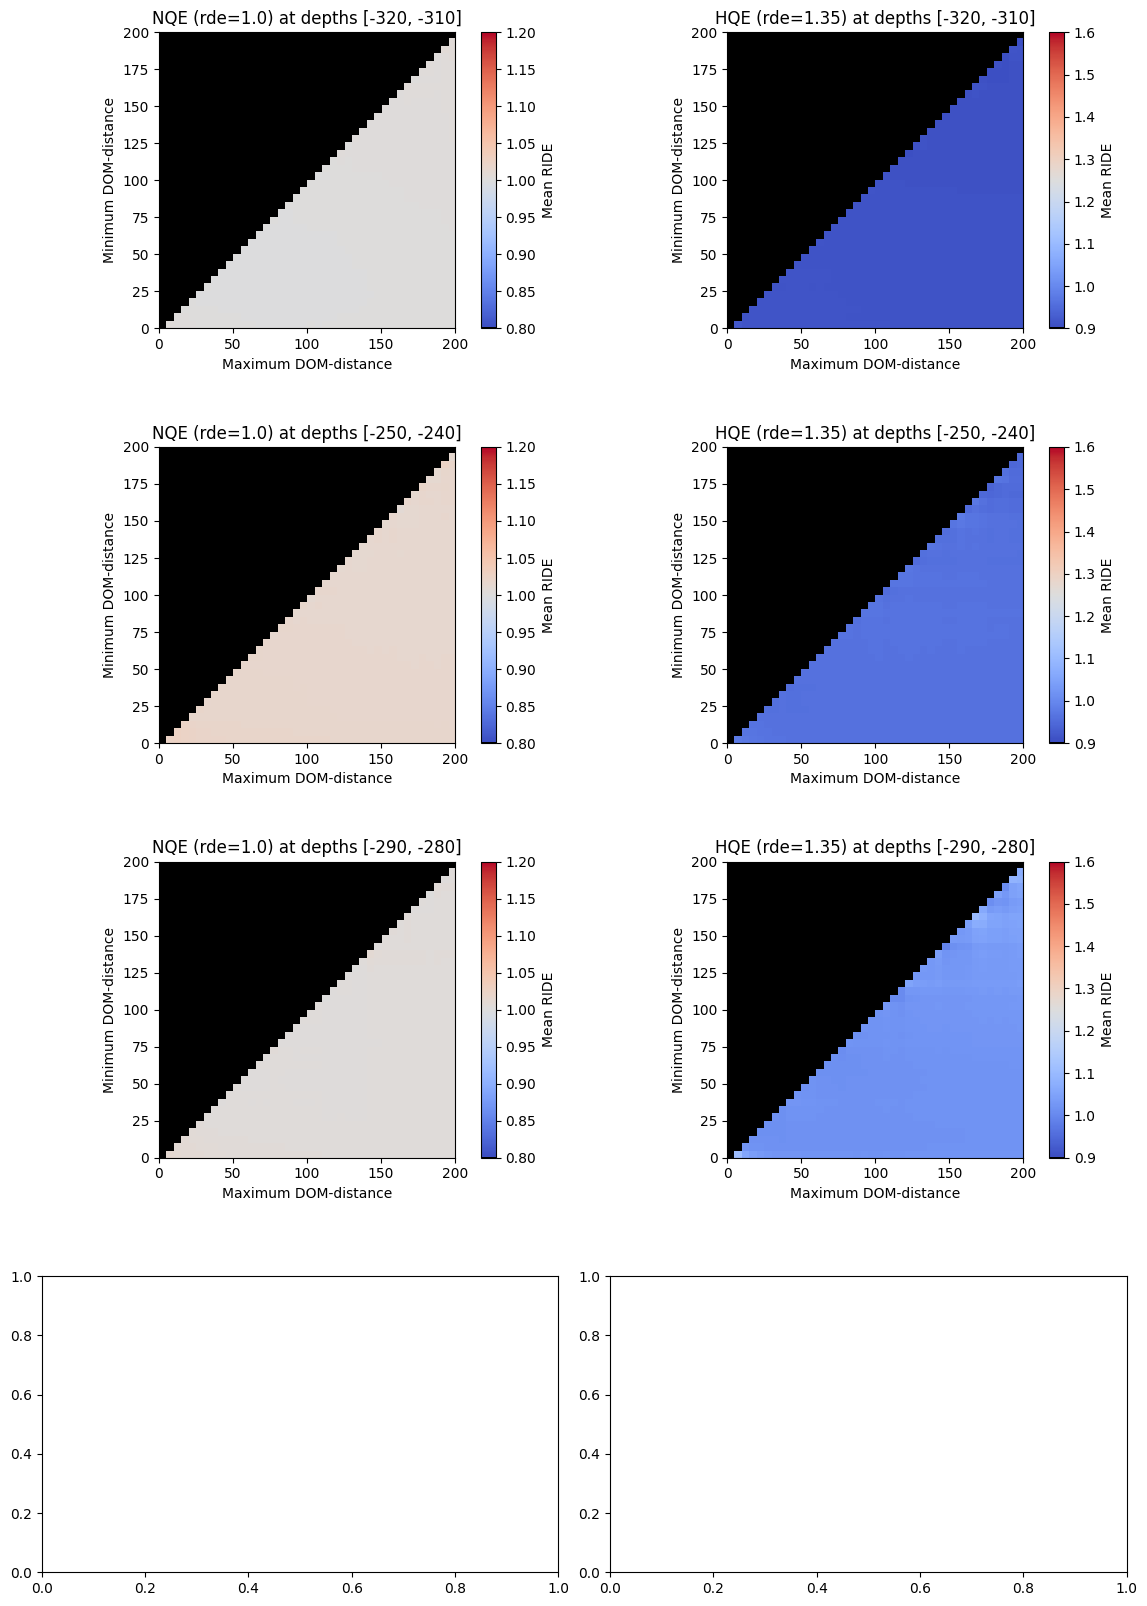

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define continuous 10-meter depth bins from -500m to 0m
all_depth_bins = np.arange(-500, 0, 10)
df_splits['depth_bin'] = pd.cut(df_splits['dom_z'], bins=all_depth_bins, labels=all_depth_bins[:-1])
muon_track_length = 200

# Initialize the 'RIDE' column with NaN values
df_splits['RIDE'] = np.nan

# Limit to a single depth bin for focused analysis
focus_depth_bins = [(-320, -310), (-250, -240), (-290, -280)]

# Define finer intervals for min and max distances
min_distance_values = np.arange(0, 200, 5)
max_distance_values = np.arange(0, 200, 5)

# Separate data for NQE and HQE based on 'rde' values
efficiency_groups = {
    "NQE (rde=1.0)": df_splits[df_splits['rde'] == 1.0], 
    "HQE (rde=1.35)": df_splits[df_splits['rde'] == 1.35]
}

# Pre-calculate monitor values **only** for the depth bins of interest
monitor_values = {}
grouped_nqe = efficiency_groups["NQE (rde=1.0)"].groupby('depth_bin', observed=False)

for bin, group in grouped_nqe:
    dom_indices_nqe = np.unique(group[['dom_x', 'dom_y', 'dom_z']].values, axis=0, return_inverse=True)[1]
    
    # Calculate total charge and hits per DOM
    total_charge_per_dom_nqe = np.bincount(dom_indices_nqe, weights=group['charge'].values)
    hit_count_per_dom_nqe = np.bincount(dom_indices_nqe)
    
    # Calculate average charge per hit per DOM
    avg_charge_per_hit_nqe = total_charge_per_dom_nqe / hit_count_per_dom_nqe
    
    # Store the median value for the current depth bin in the monitor_values dictionary
    if len(avg_charge_per_hit_nqe) > 0:
        monitor_values[bin] = np.median(avg_charge_per_hit_nqe)
    else:
        monitor_values[bin] = 0

# Map monitor values to all DOMs and calculate RIDE values for only the focus depth bins
dom_positions = df_splits[['dom_x', 'dom_y', 'dom_z']].values
charges = df_splits['charge'].values
depth_bins = df_splits['depth_bin'].values
events = df_splits['event_no'].values
unique_doms, dom_indices = np.unique(dom_positions, axis=0, return_inverse=True)
avg_charge_per_hit = np.bincount(dom_indices, weights=charges) / np.bincount(dom_indices, weights=np.ones_like(events))

# Only map monitor values for DOMs that are within the focus depth bins
monitor_per_dom = np.array([monitor_values.get(float(bin), np.nan) for bin in depth_bins[dom_indices[:len(unique_doms)]]])

valid_monitor_mask = (monitor_per_dom != 0) & (~np.isnan(monitor_per_dom))
ride_values = np.full_like(avg_charge_per_hit, np.nan)
ride_values[valid_monitor_mask] = avg_charge_per_hit[valid_monitor_mask] / monitor_per_dom[valid_monitor_mask]

df_splits['RIDE'] = ride_values[dom_indices]

efficiency_groups = {
    "NQE (rde=1.0)": df_splits[df_splits['rde'] == 1.0], 
    "HQE (rde=1.35)": df_splits[df_splits['rde'] == 1.35]
}
print(f"Sample DOM positions and calculated RIDE values: {df_splits[['dom_x', 'dom_y', 'dom_z', 'charge', 'RIDE']].head(10)}")
nqe_vmin, nqe_vmax = 0.8, 1.2
hqe_vmin, hqe_vmax = 0.9, 1.6
# Create figure for plotting
fig, axs = plt.subplots(4, 2, figsize=(14, 20))  # Adjusted for one row, two columns
fig.subplots_adjust(hspace=0.4, wspace=0.1)

# Loop through the selected single depth bin
for depth_idx, (depth_min, depth_max) in enumerate(focus_depth_bins):
    sample_data = df_splits[
        (df_splits['dom_z'] >= depth_min) & 
        (df_splits['dom_z'] <= depth_max)
    ]
    
    #print(f"\nSample RIDE values for depth bin [{depth_min}, {depth_max}]:")
    #print(sample_data[['dom_x', 'dom_y', 'dom_z', 'charge', 'RIDE']].head(10))  # Print sample RIDE data
    
    for eff_label, data in efficiency_groups.items():
        data_filtered = data[(data['dom_z'] >= depth_min) & (data['dom_z'] <= depth_max)]  # Apply depth filter
        total_events = 0
        total_doms = 0
        # Prepare ride grid and counts
        ride_grid = np.zeros((len(min_distance_values), len(max_distance_values)))
        ride_grid_counts = np.zeros((len(min_distance_values), len(max_distance_values)))

        # Iterate through each event
        for event_no, event_data in data_filtered.groupby('event_no'):
            total_events += 1
            primary_data = df_truth[df_truth['event_no'] == event_no]
            if primary_data.empty:
                continue

            # Start and end points of the muon track
            P1 = primary_data[['position_x', 'position_y', 'position_z']].values[0]
            zenith, azimuth = primary_data['zenith'].values[0], primary_data['azimuth'].values[0]
            P2 = P1 + muon_track_length * np.array([
                np.sin(zenith) * np.cos(azimuth),
                np.sin(zenith) * np.sin(azimuth),
                np.cos(zenith)
            ])

            dom_positions = event_data[['dom_x', 'dom_y', 'dom_z']].values
            ride_values = event_data['RIDE'].values

            # Print DOM distance and RIDE values
            dom_distances = calculate_dom_distances(dom_positions, P1, P2)
            total_doms += len(dom_distances)
            #for i, dom_dist in enumerate(dom_distances):
            #    print(f"DOM {i}: distance = {dom_dist}, ride_value = {ride_values[i]}")
            
            # Proceed with grid logic
            for i, dom_dist in enumerate(dom_distances):
                ride_value = ride_values[i]
                if not np.isnan(ride_value):
                    # Loop over all combinations of min_dist_bin and max_dist_bin
                    for min_dist_bin in range(len(min_distance_values)):
                        for max_dist_bin in range(min_dist_bin, len(max_distance_values)):  # Only fill lower triangle (min <= max)
                            min_dist = min_distance_values[min_dist_bin]
                            max_dist = max_distance_values[max_dist_bin]

                            # Check if the DOM distance falls within the min-max bin range
                            if min_dist <= dom_dist <= max_dist:
                                tolerance = 1e-2  # small tolerance to catch near-diagonal values

                                if abs(min_dist - max_dist) < tolerance:
                                    print(f"Accumulating on the diagonal at distance {min_dist} for ride_value: {ride_value}")
                                # Accumulate the RIDE value in the grid
                                ride_grid[min_dist_bin, max_dist_bin] += ride_value
                                ride_grid_counts[min_dist_bin, max_dist_bin] += 1

        # Normalize the accumulated RIDE values to get the mean
        valid_dom_contributions = np.sum(ride_grid_counts > 0)
        ride_grid = np.divide(ride_grid, ride_grid_counts, out=np.zeros_like(ride_grid), where=ride_grid_counts != 0)
        print(f"Depth bin [{depth_min}, {depth_max}], Efficiency group: {eff_label}, Total contributing events: {total_events}, Total DOMs: {total_doms}")
        
        # Setup colormap: Set zeros (no contribution) to black
        cmap = plt.get_cmap('coolwarm')
        colors = cmap(np.arange(cmap.N))
        colors[0] = np.array([0, 0, 0, 1])  # Set first color (zero) to black
        custom_cmap = mcolors.ListedColormap(colors)

        # Mask zero values in the ride grid so they don't affect the color range
        ride_grid_masked = np.ma.masked_where(ride_grid == 0, ride_grid)

        # Plot with imshow, using the custom colormap
        ax = axs[depth_idx,0 if eff_label == "NQE (rde=1.0)" else 1]
        im = ax.imshow(
            ride_grid_masked,  # No need to transpose now, we are flipping axes
            cmap=custom_cmap, origin='lower',
            vmin=(nqe_vmin if eff_label == "NQE (rde=1.0)" else hqe_vmin),
            vmax=(nqe_vmax if eff_label == "NQE (rde=1.0)" else hqe_vmax),
            extent=[0, 200, 0, 200]  # Adjust if needed for the correct range
        )
        ax.set_facecolor('black')
        ax.set_title(f"{eff_label} at depths [{depth_min}, {depth_max}]")
        ax.set_ylabel("Minimum DOM-distance")
        ax.set_xlabel("Maximum DOM-distance")
        fig.colorbar(im, ax=ax, label="Mean RIDE")

plt.show()


Sample NQE DOM positions and calculated RIDE_NQE values:
         dom_x      dom_y       dom_z    charge  RIDE_NQE
397  57.238209 -83.559966 -292.868527  1.242958       NaN
398  57.238209 -83.559966 -292.868527  1.164914       NaN
399  57.238209 -83.559966 -292.868527  0.641547       NaN
400  57.238209 -83.559966 -292.868527  1.394020       NaN
401  57.238209 -83.559966 -292.868527  0.745153       NaN
402  57.238209 -83.559966 -292.868527  0.876993       NaN
403  57.238209 -83.559966 -292.868527  0.719119       NaN
404  57.238209 -83.559966 -292.868527  0.394418       NaN
405  57.238209 -83.559966 -292.868527  1.345999       NaN
406  57.238209 -83.559966 -292.868527  1.361285       NaN
Sample HQE DOM positions and calculated RIDE_HQE values:
       dom_x   dom_y   dom_z    charge  RIDE_HQE
652   -10.97    6.72 -241.10  1.004557       NaN
1742   57.20 -105.52  125.95  1.042844       NaN
1743   -9.68  -79.50  100.90  0.780934       NaN
1744   -9.68  -79.50 -170.43  0.264861  0.983402
174

KeyboardInterrupt: 

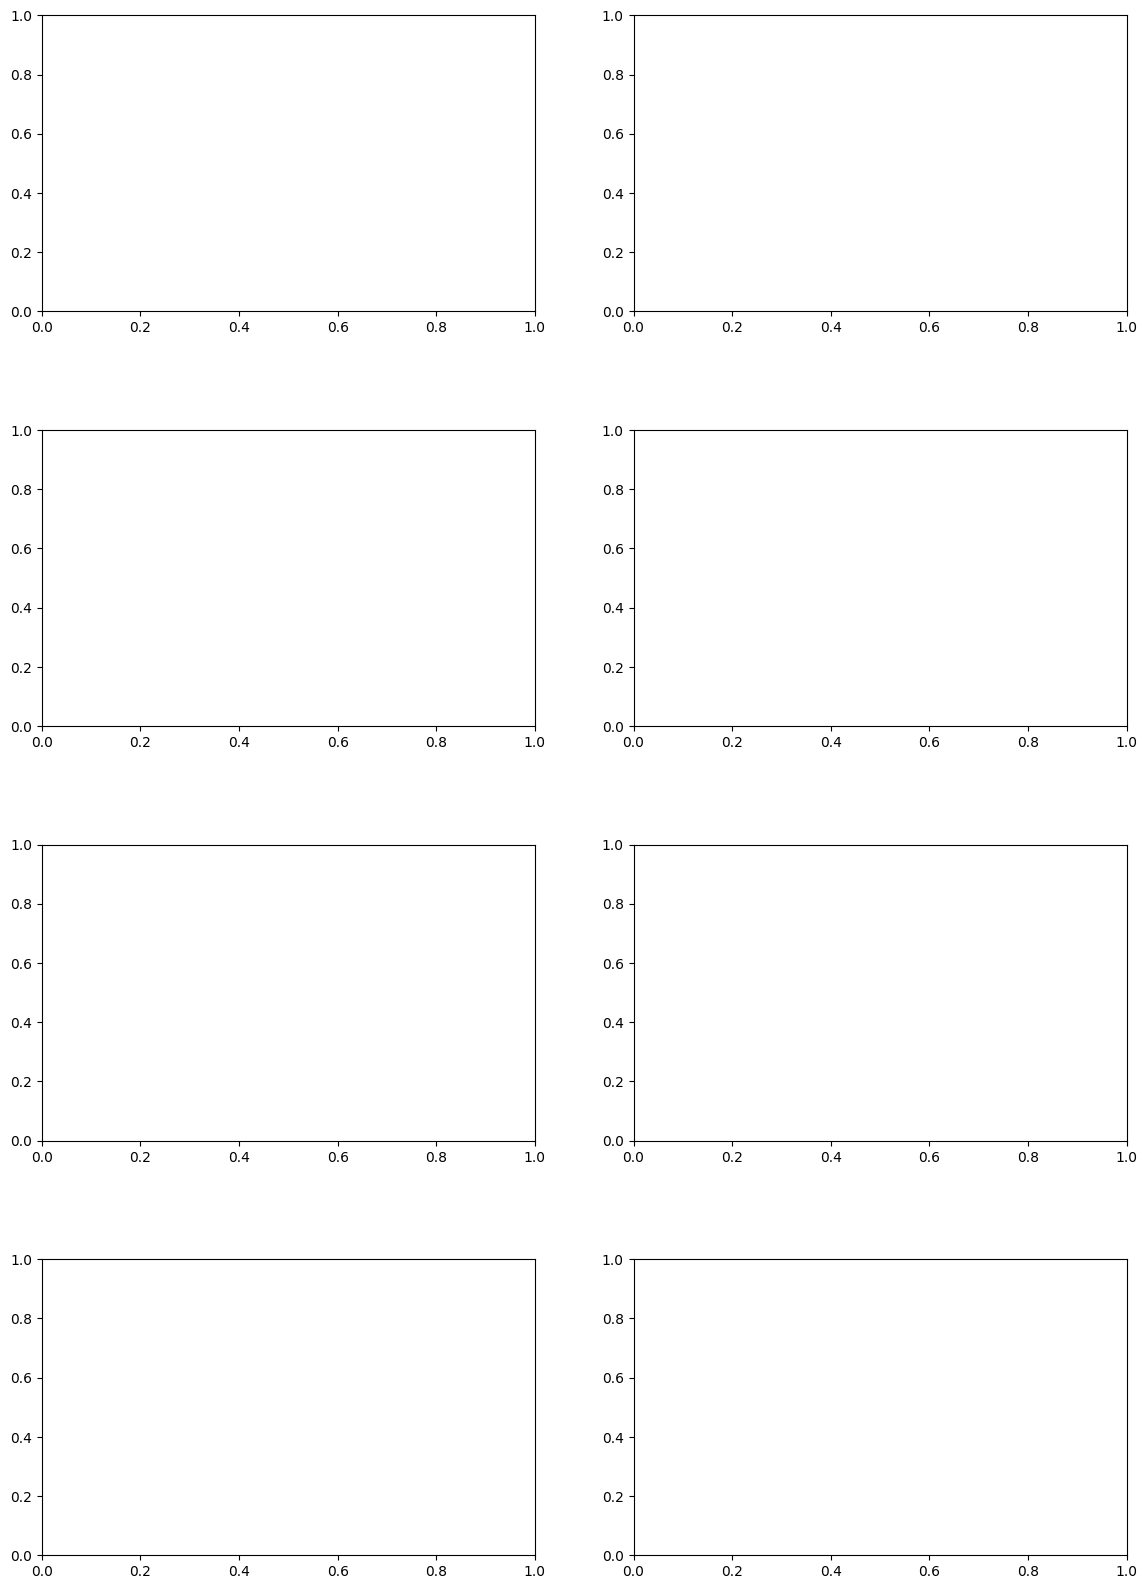

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df_truth = df_truth[df_truth['stopped_muon']==1]
df_truth = df_truth[df_truth['SubEventID']==0]
# Apply the same mask to the split data
df_splits = df_splits[df_splits['event_no'].isin(df_truth['event_no'])]
# Define continuous 10-meter depth bins from -500m to 0m
all_depth_bins = np.arange(-500, 0, 10)
df_splits['depth_bin'] = pd.cut(df_splits['dom_z'], bins=all_depth_bins, labels=all_depth_bins[:-1])

# Initialize columns for 'RIDE_NQE' and 'RIDE_HQE' with NaN values
df_splits['RIDE_NQE'] = np.nan
df_splits['RIDE_HQE'] = np.nan

# Define specific depth ranges for focused plots
focus_depth_bins = [(-320, -310), (-250, -240), (-200, -190)]

# Separate data for NQE and HQE based on 'rde' values
nqe_group = df_splits[df_splits['rde'] == 1.0]  # Only DOMs with rde = 1.0 for NQE
hqe_group = df_splits[df_splits['rde'] == 1.35]  # Only DOMs with rde = 1.35 for HQE

# Step 1: Calculate the monitor value (median NQE charge per hit) for each depth bin
monitor_values = {}
grouped_nqe = nqe_group.groupby('depth_bin', observed=False)

for bin, group in grouped_nqe:
    dom_indices_nqe = np.unique(group[['dom_x', 'dom_y', 'dom_z']].values, axis=0, return_inverse=True)[1]
    total_charge_per_dom_nqe = np.bincount(dom_indices_nqe, weights=group['charge'].values)
    hit_count_per_dom_nqe = np.bincount(dom_indices_nqe, weights=np.ones_like(group['event_no'].values))
    
    # Calculate average charge per hit for NQE DOMs
    avg_charge_per_hit_nqe = total_charge_per_dom_nqe / hit_count_per_dom_nqe
    
    # Store the median value for this depth bin in the monitor_values dictionary
    if len(avg_charge_per_hit_nqe) > 0:
        monitor_values[bin] = np.median(avg_charge_per_hit_nqe)

    else:
        monitor_values[bin] = 0

# Step 2: Calculate total charge and number of events for each DOM for both NQE and HQE
dom_positions_nqe = nqe_group[['dom_x', 'dom_y', 'dom_z']].values
dom_positions_hqe = hqe_group[['dom_x', 'dom_y', 'dom_z']].values

charges_nqe = nqe_group['charge'].values
charges_hqe = hqe_group['charge'].values

events_nqe = nqe_group['event_no'].values
events_hqe = hqe_group['event_no'].values

depth_bins_nqe = nqe_group['depth_bin'].values
depth_bins_hqe = hqe_group['depth_bin'].values

# Unique DOMs for NQE and HQE
unique_doms_nqe, dom_indices_nqe = np.unique(dom_positions_nqe, axis=0, return_inverse=True)
unique_doms_hqe, dom_indices_hqe = np.unique(dom_positions_hqe, axis=0, return_inverse=True)

# Total charge for NQE DOMs (sum over all events the DOM is part of)
total_charge_per_dom_nqe = np.bincount(dom_indices_nqe, weights=charges_nqe)

# Count the number of unique events each DOM participated in (this is now the number of events, not hits)
event_count_per_dom_nqe = np.bincount(dom_indices_nqe, weights=np.ones_like(events_nqe))

# Average charge per event for each NQE DOM
avg_charge_per_event_nqe = total_charge_per_dom_nqe / event_count_per_dom_nqe

# Step 3: Calculate the monitor value (median NQE average charge per event) for each depth bin
monitor_per_dom_nqe = np.array([monitor_values.get(float(bin), np.nan) for bin in depth_bins_nqe[dom_indices_nqe[:len(unique_doms_nqe)]]])

# Step 4: Calculate RIDE for NQE DOMs using the monitor value
valid_monitor_mask_nqe = (monitor_per_dom_nqe != 0) & (~np.isnan(monitor_per_dom_nqe))
ride_nqe_values = np.full_like(avg_charge_per_event_nqe, np.nan)
ride_nqe_values[valid_monitor_mask_nqe] = avg_charge_per_event_nqe[valid_monitor_mask_nqe] / monitor_per_dom_nqe[valid_monitor_mask_nqe]

df_splits.loc[nqe_group.index, 'RIDE_NQE'] = ride_nqe_values[dom_indices_nqe]

# Repeat the process for HQE DOMs (using the monitor from NQE DOMs)

# Total charge for HQE DOMs
total_charge_per_dom_hqe = np.bincount(dom_indices_hqe, weights=charges_hqe)

# Count the number of unique events each HQE DOM participated in
event_count_per_dom_hqe = np.bincount(dom_indices_hqe, weights=np.ones_like(events_hqe))

# Average charge per event for each HQE DOM
avg_charge_per_event_hqe = total_charge_per_dom_hqe / event_count_per_dom_hqe

# Use the same NQE monitor values
monitor_per_dom_hqe = np.array([monitor_values.get(float(bin), np.nan) for bin in depth_bins_hqe[dom_indices_hqe[:len(unique_doms_hqe)]]])

valid_monitor_mask_hqe = (monitor_per_dom_hqe != 0) & (~np.isnan(monitor_per_dom_hqe))
ride_hqe_values = np.full_like(avg_charge_per_event_hqe, np.nan)
ride_hqe_values[valid_monitor_mask_hqe] = avg_charge_per_event_hqe[valid_monitor_mask_hqe] / monitor_per_dom_hqe[valid_monitor_mask_hqe]

df_splits.loc[hqe_group.index, 'RIDE_HQE'] = ride_hqe_values[dom_indices_hqe]

print(f"Sample NQE DOM positions and calculated RIDE_NQE values:\n{df_splits[df_splits['rde'] == 1.0][['dom_x', 'dom_y', 'dom_z', 'charge', 'RIDE_NQE']].head(10)}")
print(f"Sample HQE DOM positions and calculated RIDE_HQE values:\n{df_splits[df_splits['rde'] == 1.35][['dom_x', 'dom_y', 'dom_z', 'charge', 'RIDE_HQE']].head(10)}")

# Now the plotting part:
# Define color scale limits
nqe_vmin, nqe_vmax = 0.8, 1.2
hqe_vmin, hqe_vmax = 0.8, 1.2
min_distance_bins = np.arange(0, 200, 5)
max_distance_bins = np.arange(0, 200, 5)
fig, axs = plt.subplots(4, 2, figsize=(14, 20)) 
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for depth_idx, (depth_min, depth_max) in enumerate(focus_depth_bins):
    #print(f"\nDepth bin [{depth_min}, {depth_max}]")
    for eff_label, data in {"NQE": df_splits[df_splits['RIDE_NQE'].notnull()],
                            "HQE": df_splits[df_splits['RIDE_HQE'].notnull()]}.items():
        data_filtered = data[(data['dom_z'] >= depth_min) & (data['dom_z'] <= depth_max)]
        
        ride_grid = np.zeros((len(min_distance_bins), len(max_distance_bins)))
        ride_grid_counts = np.zeros((len(min_distance_bins), len(max_distance_bins)))
        total_events = 0
        total_doms = 0
        for event_no, event_data in data_filtered.groupby('event_no'):
            primary_data = df_truth[df_truth['event_no'] == event_no]
            total_events += 1
            if primary_data.empty:
                continue
            P1 = primary_data[['position_x', 'position_y', 'position_z']].values[0]
            zenith, azimuth, muon_track_length = primary_data['zenith'].values[0], primary_data['azimuth'].values[0], primary_data['track_length'].values[0]
            P2 = P1 + muon_track_length * np.array([
                np.sin(zenith) * np.cos(azimuth),
                np.sin(zenith) * np.sin(azimuth),
                np.cos(zenith)
            ])
            dom_positions = data_filtered[['dom_x', 'dom_y', 'dom_z']].values
            charges = data_filtered['charge'].values
            ride_values = data_filtered['RIDE_NQE'].values if eff_label == "NQE" else data_filtered['RIDE_HQE'].values
            
            dom_distances = calculate_dom_distances(dom_positions, P1, P2)
            total_doms += len(dom_distances)
            within_distance_mask = dom_distances <= 200
            dom_distances = dom_distances[within_distance_mask]
            ride_values = ride_values[within_distance_mask]
            charges = charges[within_distance_mask]
            
            #print(f"Event {event_no}:Number of DOMs: {len(dom_distances)}")
            for i, dom_dist in enumerate(dom_distances):
                ride_value = ride_values[i]
                if not np.isnan(ride_value):
                    # Populate lower triangular region (min_dist_bin <= max_dist_bin)
                    for min_dist_bin in range(len(min_distance_bins)):
                        for max_dist_bin in range(min_dist_bin, len(max_distance_bins)):
                            min_dist = min_distance_bins[min_dist_bin]
                            max_dist = max_distance_bins[max_dist_bin]
                            if min_dist <= dom_dist <= max_dist:
                                ride_grid[min_dist_bin, max_dist_bin] += ride_value
                                ride_grid_counts[min_dist_bin, max_dist_bin] += 1

        # Normalize the RIDE grid by the number of contributions
        ride_grid = np.divide(ride_grid, ride_grid_counts, out=np.zeros_like(ride_grid), where=ride_grid_counts != 0)
        print(f"Depth bin [{depth_min}, {depth_max}], Efficiency group: {eff_label}, Total contributing events: {total_events}, Total DOMs: {total_doms}")
        # Custom colormap to show zeros as black
        cmap = plt.get_cmap('coolwarm')
        colors = cmap(np.arange(cmap.N))
        colors[0] = np.array([0, 0, 0, 1])  # Set first color (zero) to black
        custom_cmap = mcolors.ListedColormap(colors)

        # Mask zero values
        ride_grid_masked = np.ma.masked_where(ride_grid == 0, ride_grid)

        # Plot with imshow
        ax = axs[depth_idx, 0 if eff_label == "NQE" else 1]
        im = ax.imshow(
            ride_grid_masked,
            cmap=custom_cmap, origin='lower',
            vmin=(nqe_vmin if eff_label == "NQE" else hqe_vmin),
            vmax=(nqe_vmax if eff_label == "NQE" else hqe_vmax),
            extent=[0, 200, 0, 200]
        )
        ax.set_facecolor('black')
        ax.set_title(f"{eff_label} at depths [{depth_min}, {depth_max}]")
        ax.set_ylabel("Minimum DOM-distance")
        ax.set_xlabel("Maximum DOM-distance")
        fig.colorbar(im, ax=ax, label="Mean RIDE")

plt.show()


In [ ]:
import numpy as np
import pandas as pd

#Filtert truth data for SubEvent == 0 and for stopped_muon = 1
df_truth = df_truth[df_truth['stopped_muon']==1]
df_truth = df_truth[df_truth['SubEventID']==0]
# Apply the same mask to the split data
df_splits = df_splits[df_splits['event_no'].isin(df_truth['event_no'])]

# Define continuous 10-meter depth bins from -500m to 0m
all_depth_bins = np.arange(-500, 0, 10)
df_splits['depth_bin'] = pd.cut(df_splits['dom_z'], bins=all_depth_bins, labels=all_depth_bins[:-1])

# Initialize columns for 'RIDE_NQE' and 'RIDE_HQE' with NaN values
df_splits['RIDE_NQE'] = np.nan
df_splits['RIDE_HQE'] = np.nan

# Step 1: Calculate the monitor value (median charge per hit) for each depth bin in the NQE group
monitor_values = {}
grouped_nqe = df_splits[df_splits['rde'] == 1.0].groupby('depth_bin')

for bin, group in grouped_nqe:
    dom_positions = group[['dom_x', 'dom_y', 'dom_z']].values
    charges = group['charge'].values
    dom_indices, inverse = np.unique(dom_positions, axis=0, return_inverse=True)
    
    # Total charge per DOM and number of hits per DOM
    total_charge_per_dom = np.bincount(inverse, weights=charges)
    hit_count_per_dom = np.bincount(inverse)

    # Average charge per hit per DOM
    avg_charge_per_hit = total_charge_per_dom / hit_count_per_dom

    # Monitor value is the median of the average charge per hit within this depth bin
    monitor_values[bin] = np.median(avg_charge_per_hit) if len(avg_charge_per_hit) > 0 else 1

# Step 2: Calculate the numerator (total charge per DOM divided by hit count) for NQE and HQE groups
ride_nqe_dict = {}
ride_hqe_dict = {}

for dom_id, group in df_splits.groupby(['dom_x', 'dom_y', 'dom_z']):
    charges = group['charge'].values
    rde_value = group['rde'].iloc[0]
    depth_bin = group['depth_bin'].iloc[0]
    
    # Total charge across all events for the DOM and number of hits (non-zero charges)
    total_charge = charges.sum()
    hit_count = (charges > 0).sum()
    
    if hit_count > 0:
        # Calculate the average charge per hit (numerator)
        avg_charge_per_hit_dom = total_charge / hit_count
        
        # Use monitor value for normalization based on depth bin
        monitor_value = monitor_values.get(depth_bin, 1)

        # Calculate RIDE
        ride_value = avg_charge_per_hit_dom / monitor_value
        
        # Store in respective dictionary based on NQE or HQE
        if rde_value == 1.0:
            ride_nqe_dict[dom_id] = ride_value
        elif rde_value == 1.35:
            ride_hqe_dict[dom_id] = ride_value

# Step 3: Map calculated RIDE values back to df_splits

# Map RIDE_NQE values
ride_nqe_series = pd.Series(ride_nqe_dict)
df_splits['RIDE_NQE'] = df_splits.apply(
    lambda row: ride_nqe_series.get((row['dom_x'], row['dom_y'], row['dom_z']), np.nan), axis=1
)

# Map RIDE_HQE values
ride_hqe_series = pd.Series(ride_hqe_dict)
df_splits['RIDE_HQE'] = df_splits.apply(
    lambda row: ride_hqe_series.get((row['dom_x'], row['dom_y'], row['dom_z']), np.nan), axis=1
)

# Now the plotting part:
# Define color scale limits
nqe_vmin, nqe_vmax = 0.8, 1.2
hqe_vmin, hqe_vmax = 0.8, 1.2
min_distance_bins = np.arange(0, 200, 5)
max_distance_bins = np.arange(0, 200, 5)
fig, axs = plt.subplots(4, 2, figsize=(14, 20)) 
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for depth_idx, (depth_min, depth_max) in enumerate(focus_depth_bins):
    for eff_label, data in {"NQE": df_splits[df_splits['RIDE_NQE'].notnull()],
                            "HQE": df_splits[df_splits['RIDE_HQE'].notnull()]}.items():
        data_filtered = data[(data['dom_z'] >= depth_min) & (data['dom_z'] <= depth_max)]
        
        ride_grid = np.zeros((len(min_distance_bins), len(max_distance_bins)))
        ride_grid_counts = np.zeros((len(min_distance_bins), len(max_distance_bins)))
        total_events = 0
        total_doms = 0
        for event_no, event_data in data_filtered.groupby('event_no'):
            primary_data = df_truth[df_truth['event_no'] == event_no]  
            total_events += 1
            if primary_data.empty:
                continue
            P1 = primary_data[['position_x', 'position_y', 'position_z']].values[0]
            zenith, azimuth, muon_track_length = primary_data['zenith'].values[0], primary_data['azimuth'].values[0], primary_data['track_length'].values[0]
            P2 = P1 + muon_track_length * np.array([
                np.sin(zenith) * np.cos(azimuth),
                np.sin(zenith) * np.sin(azimuth),
                np.cos(zenith)
            ])
            dom_positions = data_filtered[['dom_x', 'dom_y', 'dom_z']].values
            charges = data_filtered['charge'].values
            ride_values = data_filtered['RIDE_NQE'].values if eff_label == "NQE" else data_filtered['RIDE_HQE'].values
            
            dom_distances = calculate_dom_distances(dom_positions, P1, P2)
            total_doms += len(dom_distances)
            within_distance_mask = dom_distances <= 200
            dom_distances = dom_distances[within_distance_mask]
            ride_values = ride_values[within_distance_mask]
            charges = charges[within_distance_mask]
            
            # Populate the RIDE grid
            for i, dom_dist in enumerate(dom_distances):
                ride_value = ride_values[i]
                if not np.isnan(ride_value):
                    # Populate lower triangular region (min_dist_bin <= max_dist_bin)
                    for min_dist_bin in range(len(min_distance_bins)):
                        for max_dist_bin in range(min_dist_bin, len(max_distance_bins)):
                            min_dist = min_distance_bins[min_dist_bin]
                            max_dist = max_distance_bins[max_dist_bin]
                            if min_dist <= dom_dist <= max_dist:
                                ride_grid[min_dist_bin, max_dist_bin] += ride_value
                                ride_grid_counts[min_dist_bin, max_dist_bin] += 1

        # Normalize the RIDE grid by the number of contributions
        ride_grid = np.divide(ride_grid, ride_grid_counts, out=np.zeros_like(ride_grid), where=ride_grid_counts != 0)
        print(f"Depth bin [{depth_min}, {depth_max}], Efficiency group: {eff_label}, Total contributing events: {total_events}, Total DOMs: {total_doms}")
        # Custom colormap to show zeros as black
        cmap = plt.get_cmap('coolwarm')
        colors = cmap(np.arange(cmap.N))
        colors[0] = np.array([0, 0, 0, 1])  # Set first color (zero) to black
        custom_cmap = mcolors.ListedColormap(colors)

        # Mask zero values
        ride_grid_masked = np.ma.masked_where(ride_grid == 0, ride_grid)

        # Plot with imshow
        ax = axs[depth_idx, 0 if eff_label == "NQE" else 1]
        im = ax.imshow(
            ride_grid_masked,
            cmap=custom_cmap, origin='lower',
            vmin=(nqe_vmin if eff_label == "NQE" else hqe_vmin),
            vmax=(nqe_vmax if eff_label == "NQE" else hqe_vmax),
            extent=[0, 200, 0, 200]
        )
        ax.set_facecolor('black')
        ax.set_title(f"{eff_label} at depths [{depth_min}, {depth_max}]")
        ax.set_ylabel("Minimum DOM-distance")
        ax.set_xlabel("Maximum DOM-distance")
        fig.colorbar(im, ax=ax, label="Mean RIDE")

plt.show()


/tmp/ipykernel_3301017/3775361049.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_nqe = df_splits[df_splits['rde'] == 1.0].groupby('depth_bin')


KeyboardInterrupt: 

KeyboardInterrupt: 

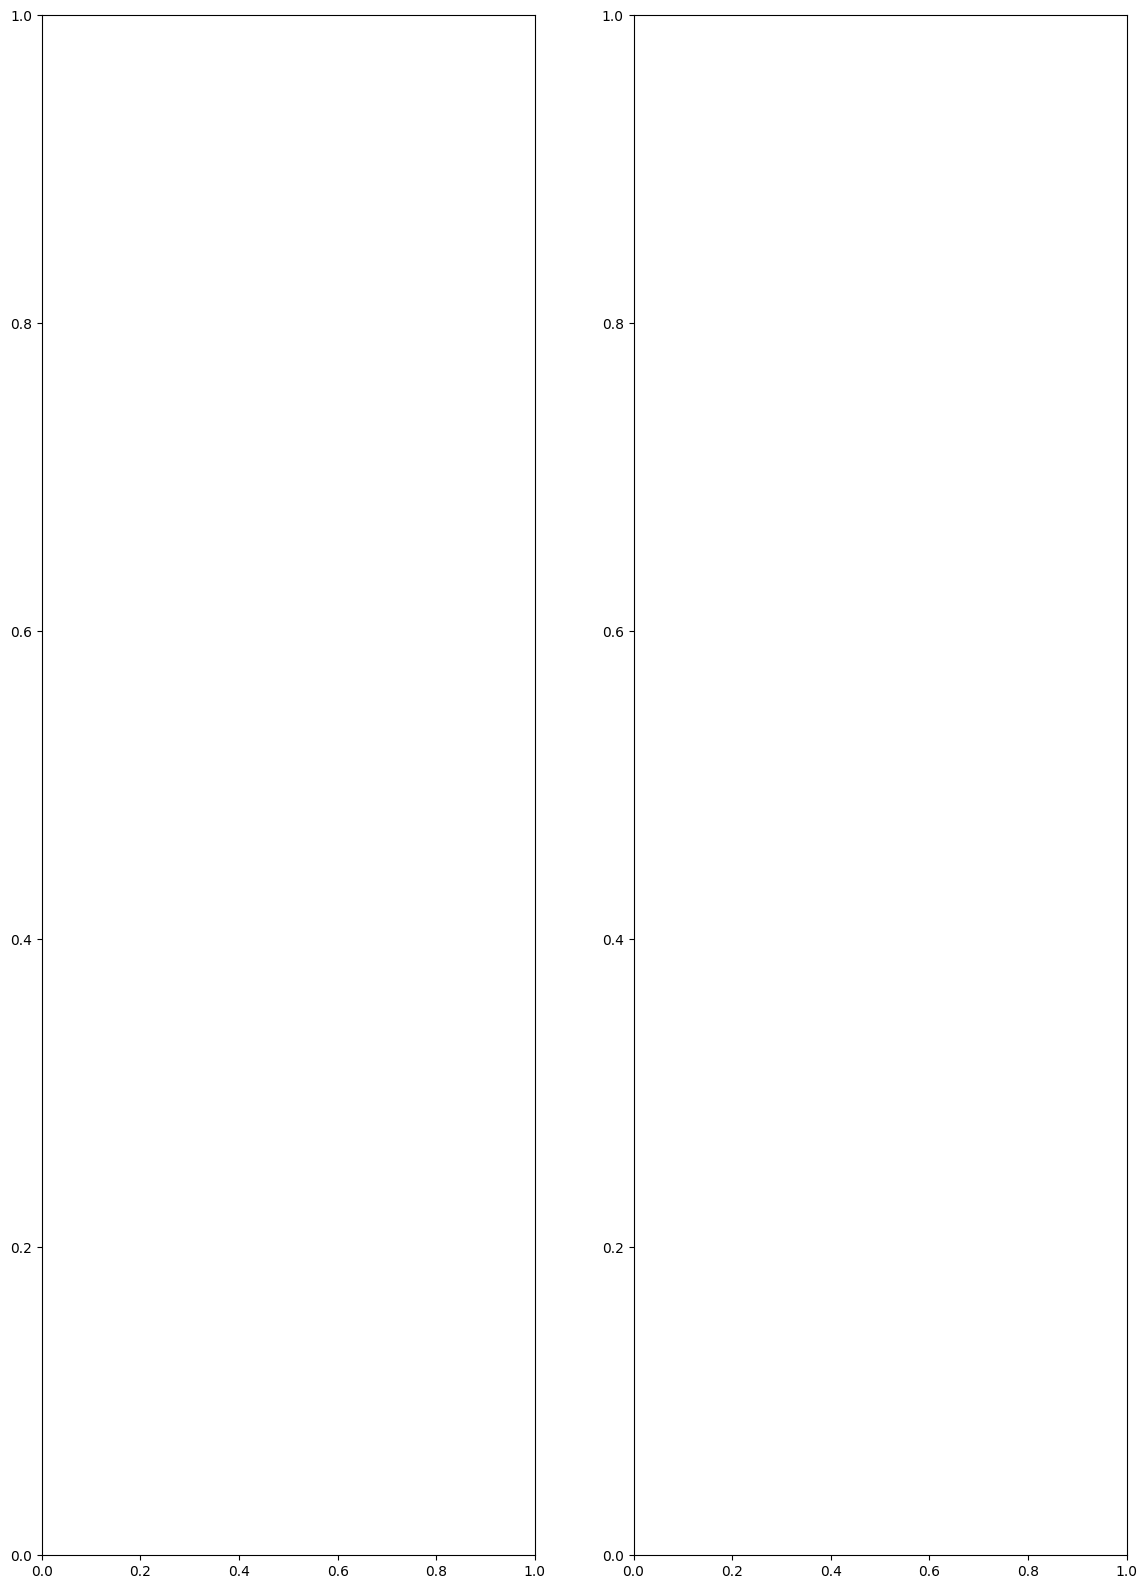

In [13]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Filter the dataframe based on conditions
df_truth = df_truth[(df_truth['stopped_muon'] == 1) & (df_truth['SubEventID'] == 0)]
df_splits = df_splits[df_splits['event_no'].isin(df_truth['event_no'])]

# Define depth bins and labels
all_depth_bins = np.arange(-500, 0, 10)
df_splits['depth_bin'] = pd.cut(df_splits['dom_z'], bins=all_depth_bins, labels=all_depth_bins[:-1])

# Initialize columns for 'RIDE_NQE' and 'RIDE_HQE'
df_splits[['RIDE_NQE', 'RIDE_HQE']] = np.nan

# Separate NQE and HQE groups based on 'rde' values
nqe_group = df_splits[df_splits['rde'] == 1.0]
hqe_group = df_splits[df_splits['rde'] == 1.35]

# Use PyTorch tensors and move to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Calculate median NQE charge per hit for each depth bin
monitor_values = {}
for bin, group in nqe_group.groupby('depth_bin', observed=False):
    dom_positions = torch.tensor(group[['dom_x', 'dom_y', 'dom_z']].values, device=device)
    dom_indices = torch.unique(dom_positions, dim=0, return_inverse=True)[1]
    charges = torch.tensor(group['charge'].values, device=device, dtype=torch.float32)
    
    total_charge = torch.bincount(dom_indices, weights=charges)
    hit_count = torch.bincount(dom_indices)
    
    avg_charge_per_hit = total_charge / hit_count
    monitor_values[bin] = avg_charge_per_hit.median().item() if avg_charge_per_hit.numel() > 0 else 0

# Function to calculate RIDE values using PyTorch
def calculate_ride(df, monitor_vals, device):
    dom_positions = torch.tensor(df[['dom_x', 'dom_y', 'dom_z']].values, device=device)
    charges = torch.tensor(df['charge'].values, device=device, dtype=torch.float32)
    events = torch.tensor(df['event_no'].values, device=device)
    
    # Find unique DOM positions and their indices
    unique_doms, dom_indices = torch.unique(dom_positions, dim=0, return_inverse=True)
    total_charge = torch.bincount(dom_indices, weights=charges)
    event_count = torch.bincount(dom_indices)
    avg_charge_per_event = total_charge / event_count
    
    # Create an array for all monitor values, matching the length of `dom_indices`
    monitor_values_tensor = torch.tensor([monitor_vals.get(float(bin), np.nan) for bin in df['depth_bin']], device=device)
    monitor_values_expanded = monitor_values_tensor[dom_indices]
    
    # Calculate RIDE for valid entries
    valid_mask = (monitor_values_expanded != 0) & (~torch.isnan(monitor_values_expanded))
    ride_values = torch.full((len(df),), torch.nan, device=device)
    ride_values[valid_mask] = avg_charge_per_event[dom_indices][valid_mask] / monitor_values_expanded[valid_mask]
    
    # Return as a numpy array of the same length as `df`
    return ride_values.cpu().numpy()

# Calculate RIDE values for NQE and HQE
df_splits.loc[nqe_group.index, 'RIDE_NQE'] = calculate_ride(nqe_group, monitor_values, device)
df_splits.loc[hqe_group.index, 'RIDE_HQE'] = calculate_ride(hqe_group, monitor_values, device)

# Plotting with PyTorch for GPU acceleration is not common, so we use standard Matplotlib for visualization
focus_depth_bins = [(-320, -310)]#, (-250, -240), (-200, -190)]
min_distance_bins = np.arange(0, 200, 5)
max_distance_bins = np.arange(0, 200, 5)

fig, axs = plt.subplots(len(focus_depth_bins), 2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for depth_idx, (depth_min, depth_max) in enumerate(focus_depth_bins):
    for eff_label, data in {"NQE": df_splits[df_splits['RIDE_NQE'].notnull()],
                            "HQE": df_splits[df_splits['RIDE_HQE'].notnull()]}.items():
        data_filtered = data[(data['dom_z'] >= depth_min) & (data['dom_z'] <= depth_max)]

        # Pre-allocate arrays for ride_grid and counts
        ride_grid = np.zeros((len(min_distance_bins), len(max_distance_bins)))
        ride_grid_counts = np.zeros((len(min_distance_bins), len(max_distance_bins)))
        
        # Calculate DOM distances and RIDE values
        for event_no, event_data in data_filtered.groupby('event_no'):
            primary_data = df_truth[df_truth['event_no'] == event_no]
            if primary_data.empty:
                continue
            
            P1 = primary_data[['position_x', 'position_y', 'position_z']].values[0]
            zenith, azimuth, track_length = primary_data[['zenith', 'azimuth', 'track_length']].values[0]
            P2 = P1 + track_length * np.array([np.sin(zenith) * np.cos(azimuth), np.sin(zenith) * np.sin(azimuth), np.cos(zenith)])
            
            dom_positions = torch.tensor(data_filtered[['dom_x', 'dom_y', 'dom_z']].values, device=device)
            dom_positions = dom_positions.to(dtype=torch.float32)  
            P1 = torch.tensor(P1, device=device, dtype=torch.float32)
            P2 = torch.tensor(P2, device=device, dtype=torch.float32)
            
            direction = (P2 - P1).unsqueeze(0).to(dtype=torch.float32)  # Makes direction have shape [1, 3]
            dom_distances = torch.norm(torch.cross(direction, dom_positions - P1, dim=1) / torch.norm(direction, dim=1), dim=1).cpu().numpy()
            dom_distances = dom_distances[dom_distances <= 200]
            
            ride_values = data_filtered['RIDE_NQE' if eff_label == "NQE" else 'RIDE_HQE'].values[:len(dom_distances)]
            
            for min_idx, min_dist in enumerate(min_distance_bins):
                max_dist = max_distance_bins[min_idx:]

                # Expand dom_distances to shape [234, 1] and max_dist to shape [1, 40] for broadcasting
                expanded_dom_distances = dom_distances[:, None]
                mask = (expanded_dom_distances >= min_dist) & (expanded_dom_distances <= max_dist)

                # Update ride_grid and ride_grid_counts with the broadcasted mask
                ride_values_expanded = ride_values[:, None]  # Make ride_values compatible with mask
                ride_grid[min_idx, min_idx:] += np.where(mask, ride_values_expanded, 0).sum(axis=0)
                ride_grid_counts[min_idx, min_idx:] += mask.sum(axis=0)
                
        ride_grid = np.divide(ride_grid, ride_grid_counts, out=np.zeros_like(ride_grid), where=ride_grid_counts != 0)
        
        # Plot
        ax = axs[depth_idx, 0 if eff_label == "NQE" else 1]
        cmap = mcolors.ListedColormap(['black'] + [plt.get_cmap('coolwarm')(i) for i in range(1, 256)])
        im = ax.imshow(np.ma.masked_where(ride_grid == 0, ride_grid), cmap=cmap, origin='lower', extent=[0, 200, 0, 200], vmin=0.8, vmax=1.2)
        ax.set_title(f"{eff_label} at depths [{depth_min}, {depth_max}]")
        ax.set_xlabel("Max DOM Distance")
        ax.set_ylabel("Min DOM Distance")
        fig.colorbar(im, ax=ax, label="Mean RIDE")

plt.show()


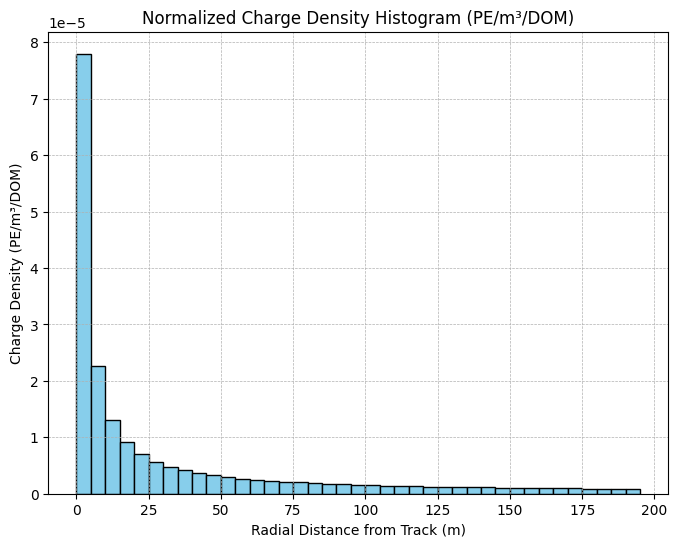

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_radial_distance(dom_positions, P1, P2):
    # Track vector and normalized direction
    muon_dir = P2 - P1
    muon_dir_unit = muon_dir / np.linalg.norm(muon_dir)
    
    # Projection length from P1 to the perpendicular point on track
    vec_P1_DOM = dom_positions - P1
    projection_lengths = np.dot(vec_P1_DOM, muon_dir_unit)
    P_closest = P1 + np.outer(projection_lengths, muon_dir_unit)  # Closest point on the track
    
    # Calculate radial distances
    radial_distances = np.linalg.norm(dom_positions - P_closest, axis=1)
    return radial_distances

# Define bins for radial distances (in meters)
radial_bins = np.arange(0, 200, 5)
charge_density = np.zeros(len(radial_bins) - 1)
dom_counts = np.zeros(len(radial_bins) - 1)  # To count DOMs per radial bin

# Loop through events and accumulate charge density
for event_no, event_data in df_splits.groupby('event_no'):
    primary_data = df_truth[df_truth['event_no'] == event_no]
    if primary_data.empty:
        continue
    
    P1 = primary_data[['position_x', 'position_y', 'position_z']].values[0]
    zenith, azimuth, track_length = primary_data[['zenith', 'azimuth', 'track_length']].values[0]
    P2 = P1 + track_length * np.array([np.sin(zenith) * np.cos(azimuth), np.sin(zenith) * np.sin(azimuth), np.cos(np.pi - zenith)])

    # Get DOM positions and charges
    dom_positions = event_data[['dom_x', 'dom_y', 'dom_z']].values
    charges = event_data['charge'].values

    # Calculate radial distances
    radial_distances = calculate_radial_distance(dom_positions, P1, P2)
    
    # Bin charges and DOM counts based on radial distances
    hist, _ = np.histogram(radial_distances, bins=radial_bins, weights=charges)
    dom_count, _ = np.histogram(radial_distances, bins=radial_bins)
    
    charge_density += hist
    dom_counts += dom_count

# Calculate the cylindrical volume for each radial bin
bin_volumes = np.pi * (radial_bins[1:]**2 - radial_bins[:-1]**2) * muon_track_length

# Normalize the charge density by volume and DOM count
normalized_charge_density = charge_density / (bin_volumes * np.maximum(dom_counts, 1))  # Avoid division by zero

# Plot the weighted charge density histogram
plt.figure(figsize=(8, 6))
plt.bar(radial_bins[:-1], normalized_charge_density, width=np.diff(radial_bins), align='edge', color='skyblue', edgecolor='black')
plt.xlabel('Radial Distance from Track (m)')
plt.ylabel('Charge Density (PE/m³/DOM)')
plt.title('Normalized Charge Density Histogram (PE/m³/DOM)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


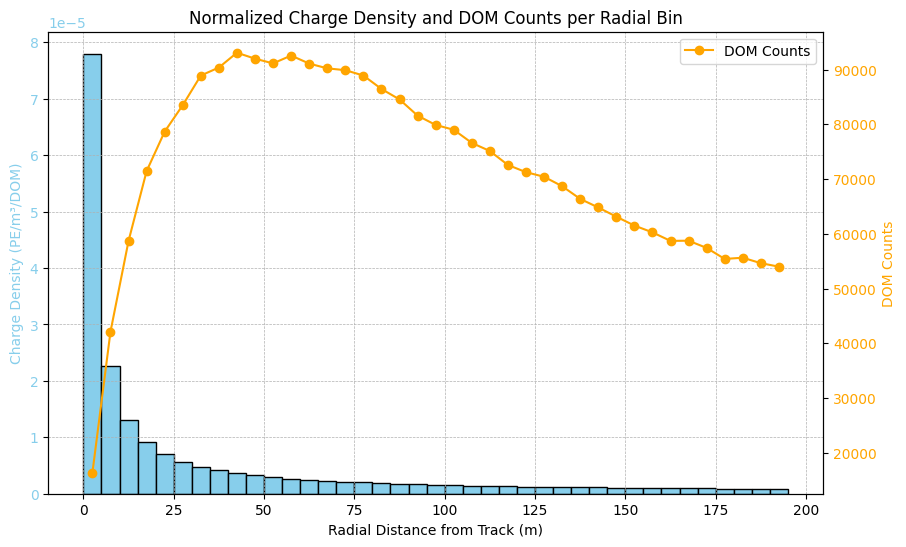

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate radial distances for DOMs from track
def calculate_radial_distance(dom_positions, P1, P2):
    muon_dir = P2 - P1
    muon_dir_unit = muon_dir / np.linalg.norm(muon_dir)
    vec_P1_DOM = dom_positions - P1
    projection_lengths = np.dot(vec_P1_DOM, muon_dir_unit)
    P_closest = P1 + np.outer(projection_lengths, muon_dir_unit)
    radial_distances = np.linalg.norm(dom_positions - P_closest, axis=1)
    return radial_distances

# Parameters
radial_bins = np.arange(0, 200, 5)  # Radial bins (in meters)
charge_density = np.zeros(len(radial_bins) - 1)
dom_counts = np.zeros(len(radial_bins) - 1)  # To count DOMs per radial bin
muon_track_length = 200  # Track length (in meters)

# Loop through events and accumulate charge density
for event_no, event_data in df_splits.groupby('event_no'):
    primary_data = df_truth[df_truth['event_no'] == event_no]
    if primary_data.empty:
        continue
    
    P1 = primary_data[['position_x', 'position_y', 'position_z']].values[0]
    zenith, azimuth, track_length = primary_data[['zenith', 'azimuth', 'track_length']].values[0]
    P2 = P1 + track_length * np.array([np.sin(zenith) * np.cos(azimuth), np.sin(zenith) * np.sin(azimuth), np.cos(np.pi - zenith)])

    # Get DOM positions and charges
    dom_positions = event_data[['dom_x', 'dom_y', 'dom_z']].values
    charges = event_data['charge'].values

    # Calculate radial distances
    radial_distances = calculate_radial_distance(dom_positions, P1, P2)
    
    # Bin charges and DOM counts based on radial distances
    hist, _ = np.histogram(radial_distances, bins=radial_bins, weights=charges)
    dom_count, _ = np.histogram(radial_distances, bins=radial_bins)
    
    charge_density += hist
    dom_counts += dom_count

# Calculate the cylindrical volume for each radial bin
bin_volumes = np.pi * (radial_bins[1:]**2 - radial_bins[:-1]**2) * muon_track_length

# Normalize the charge density by volume and DOM count
normalized_charge_density = charge_density / (bin_volumes * np.maximum(dom_counts, 1))  # Avoid division by zero

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot normalized charge density
ax1.bar(radial_bins[:-1], normalized_charge_density, width=np.diff(radial_bins), align='edge', color='skyblue', edgecolor='black')
ax1.set_xlabel('Radial Distance from Track (m)')
ax1.set_ylabel('Charge Density (PE/m³/DOM)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
#ax1.set_yscale('log')
ax1.set_title('Normalized Charge Density and DOM Counts per Radial Bin')
ax1.grid(True, which="both", ls="--", linewidth=0.5)

# Plot DOM counts on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(radial_bins[:-1] + np.diff(radial_bins) / 2, dom_counts, color='orange', marker='o', linestyle='-', label='DOM Counts')
ax2.set_ylabel('DOM Counts', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
#ax2.set_yscale('log')

# Show legend for the second y-axis
ax2.legend(loc='upper right')

plt.show()


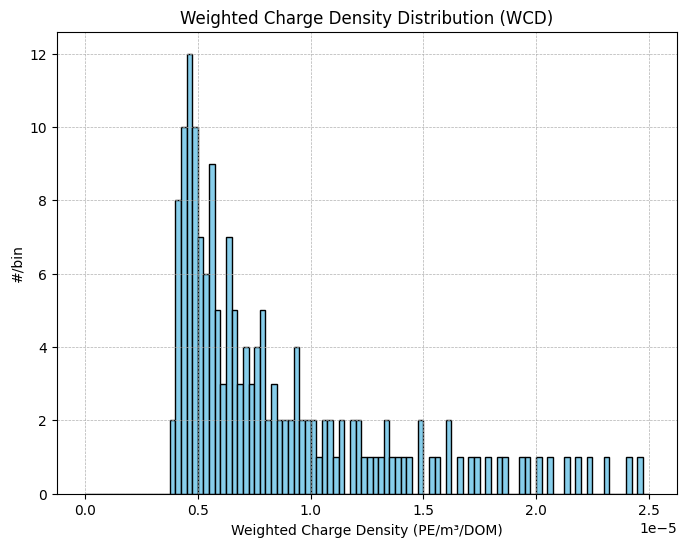

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate radial distance from the muon track to DOMs
def calculate_radial_distance(dom_positions, P1, P2):
    muon_dir = P2 - P1
    muon_dir_unit = muon_dir / np.linalg.norm(muon_dir)
    
    vec_P1_DOM = dom_positions - P1
    projection_lengths = np.dot(vec_P1_DOM, muon_dir_unit)
    P_closest = P1 + np.outer(projection_lengths, muon_dir_unit)
    
    radial_distances = np.linalg.norm(dom_positions - P_closest, axis=1)
    return radial_distances

# Define parameters
muon_track_length = 200  # 200m track length
radial_bins = np.arange(0, 200, 1)  # Bins for radial distance in meters

# Variables to accumulate charge and DOM count per radial distance bin
charge_density = np.zeros(len(radial_bins) - 1)
dom_counts = np.zeros(len(radial_bins) - 1)

# Loop through events and accumulate charge density
for event_no, event_data in df_splits.groupby('event_no'):
    primary_data = df_truth[df_truth['event_no'] == event_no]
    if primary_data.empty:
        continue
    
    P1 = primary_data[['position_x', 'position_y', 'position_z']].values[0]
    zenith, azimuth, track_length = primary_data[['zenith', 'azimuth', 'track_length']].values[0]
    P2 = P1 + track_length * np.array([np.sin(zenith) * np.cos(azimuth), np.sin(zenith) * np.sin(azimuth), np.cos(np.pi - zenith)])
    # Get DOM positions and charges
    dom_positions = event_data[['dom_x', 'dom_y', 'dom_z']].values
    charges = event_data['charge'].values# / 1.35  # Scale charges if needed
    
    # Calculate radial distances
    radial_distances = calculate_radial_distance(dom_positions, P1, P2)
    
    # Bin charges and DOM counts based on radial distances
    hist, _ = np.histogram(radial_distances, bins=radial_bins, weights=charges)
    dom_count, _ = np.histogram(radial_distances, bins=radial_bins)
    
    charge_density += hist
    dom_counts += dom_count

# Calculate cylindrical volume per bin
bin_volumes = np.pi * (radial_bins[1 :]**2 - radial_bins[:-1]**2) * muon_track_length

# Normalize the charge density by volume and DOM count
normalized_charge_density = charge_density / (bin_volumes * np.maximum(dom_counts, 1))

# Plot the histogram with a logarithmic scale on the y-axis
plt.figure(figsize=(8, 6))
plt.hist(normalized_charge_density, bins=100,range = (0,2.5e-5) , color='skyblue', edgecolor='black', log=False)
plt.xlabel('Weighted Charge Density (PE/m³/DOM)')

plt.ylabel('#/bin')
plt.title('Weighted Charge Density Distribution (WCD)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


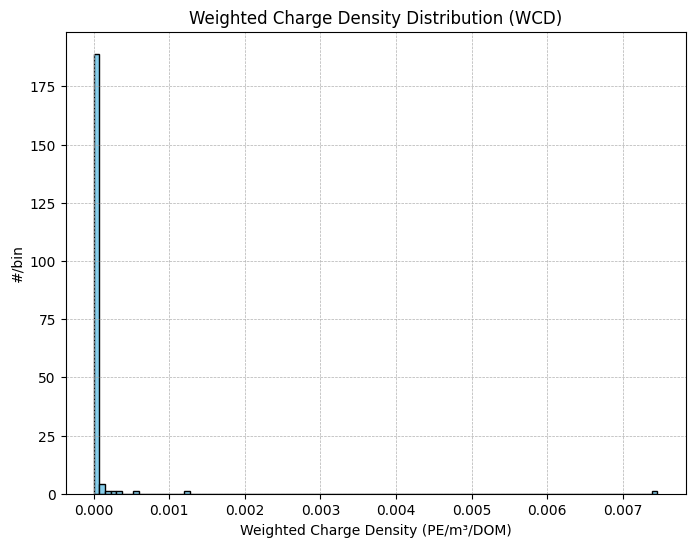

In [11]:
# Plot the histogram with a logarithmic scale on the y-axis
plt.figure(figsize=(8, 6))
plt.hist(normalized_charge_density, bins=100, color='skyblue', edgecolor='black', log=False)
plt.xlabel('Weighted Charge Density (PE/m³/DOM)')
#plt.xlim(0, 2.5e-4)
plt.ylabel('#/bin')
plt.title('Weighted Charge Density Distribution (WCD)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [69]:
def calculate_zenith_angles(dom_positions, P1, P2):
    # Calculate the vector of the muon track (P2 - P1) and normalize it
    muon_direction = P2 - P1
    muon_direction /= np.linalg.norm(muon_direction)  # Normalize the direction
    
    # Calculate the vector from P1 to each DOM
    dom_vectors = dom_positions - P1
    
    # Calculate the dot product between the DOM vectors and the muon track direction
    dot_products = np.dot(dom_vectors, muon_direction)
    
    # Calculate the magnitudes of the DOM vectors and the muon direction
    dom_magnitudes = np.linalg.norm(dom_vectors, axis=1)
    
    # Use the dot product and magnitudes to calculate the cosine of the zenith angle
    cos_zenith_angles = dot_products / dom_magnitudes
    
    # Clamp values to the range [-1, 1] to avoid numerical errors in arccos
    cos_zenith_angles = np.clip(cos_zenith_angles, -1.0, 1.0)
    
    # Calculate the zenith angles in radians
    zenith_angles = np.arccos(cos_zenith_angles)
    
    return zenith_angles


Sample NQE DOM positions and calculated RIDE_NQE values:
        dom_x      dom_y       dom_z    charge  RIDE_NQE
0  -77.800000 -54.330000 -467.480000  0.993904  0.868611
5   26.956667 -31.191250 -380.177000  0.769526  0.933070
6   26.831633 -31.243041 -418.991473  1.298131  1.125066
7   62.623333 -35.163750 -461.177000  0.530389  0.847941
8   62.623333 -35.087664 -467.074662  1.030810  1.219636
9   89.290000 -58.998750 -440.177000  0.387277  0.950324
10  89.290000 -58.998750 -478.683000  1.504072  1.305211
11  47.341791 -57.137534 -418.868527  1.385642  0.969805
12  47.290000 -57.012500 -479.177000  0.913178  1.108809
14  18.238209 -50.928716 -445.868527  1.541796  1.244368
Sample HQE DOM positions and calculated RIDE_HQE values:
    dom_x  dom_y   dom_z    charge  RIDE_HQE
1   -9.68 -79.50 -464.79  1.165534  0.980157
2   -9.68 -79.50 -478.81  0.871848  0.838172
3  -10.97   6.72 -437.34  0.974104  0.940533
4  -10.97   6.72 -451.36  1.283981  1.101532
18  46.29 -34.88 -435.17  0.778469

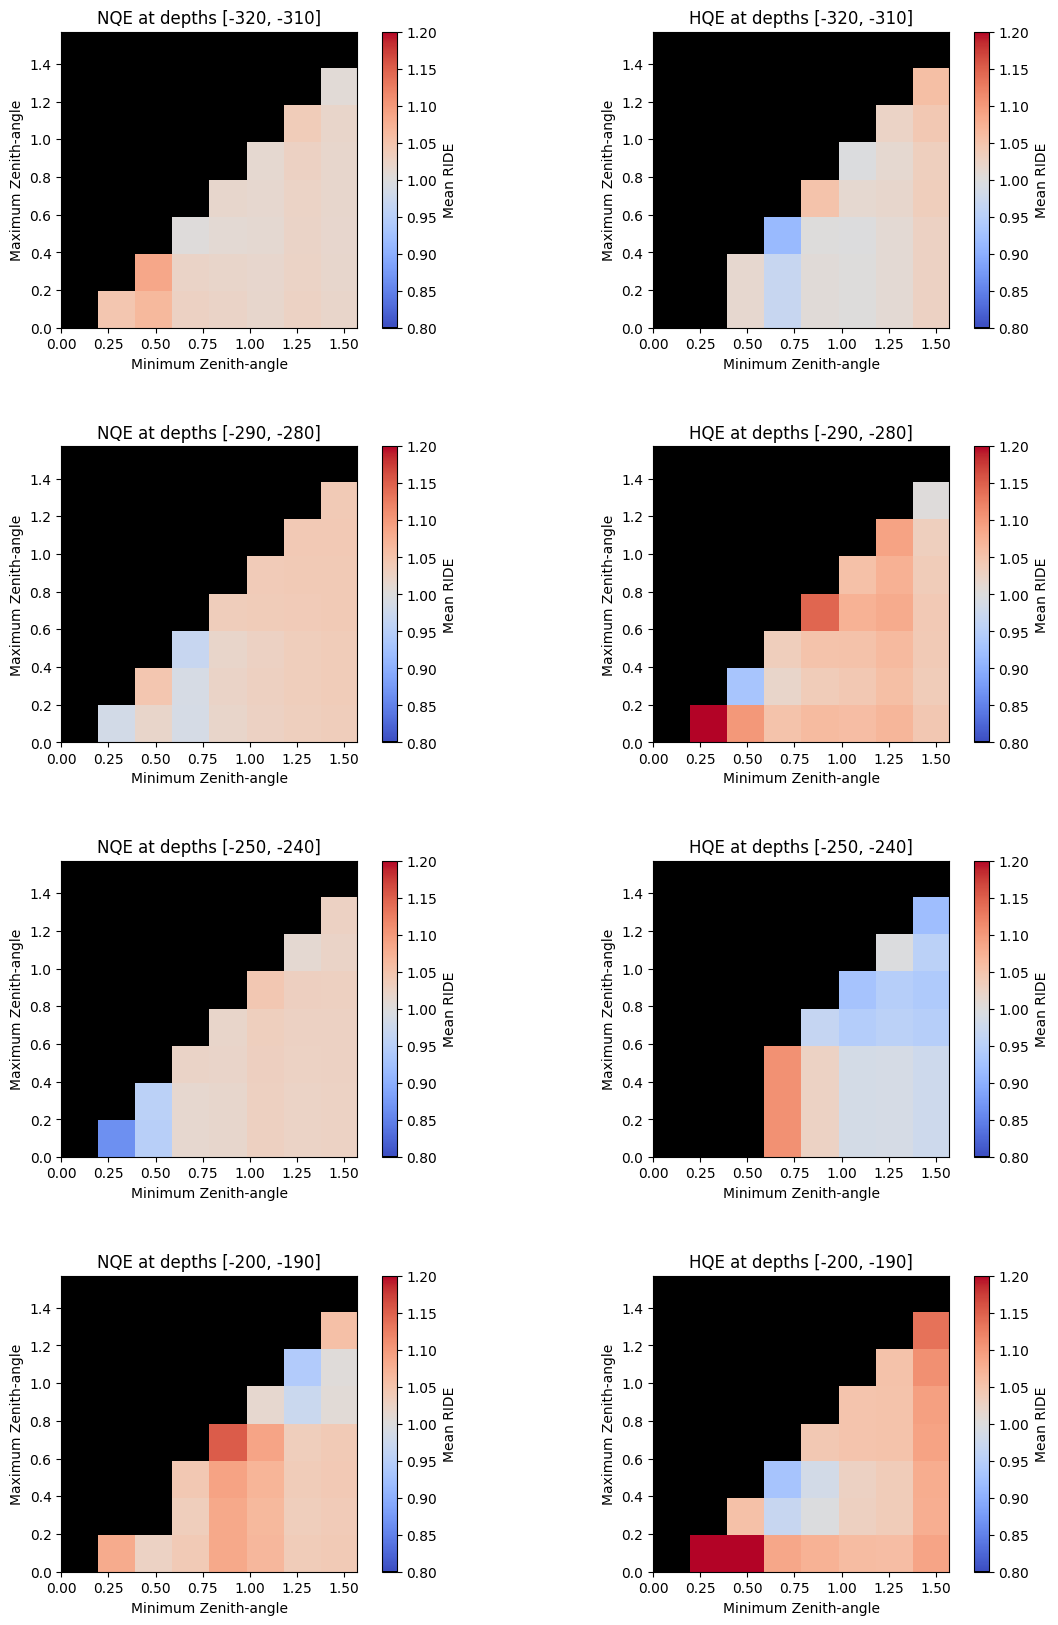

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define continuous 10-meter depth bins from -500m to 0m
all_depth_bins = np.arange(-500, 0, 10)
df_splits['depth_bin'] = pd.cut(df_splits['dom_z'], bins=all_depth_bins, labels=all_depth_bins[:-1])

# Initialize columns for 'RIDE_NQE' and 'RIDE_HQE' with NaN values
df_splits['RIDE_NQE'] = np.nan
df_splits['RIDE_HQE'] = np.nan

# Define specific depth ranges for focused plots
focus_depth_bins = [(-320, -310), (-290, -280), (-250, -240), (-200, -190)]

# Separate data for NQE and HQE based on 'rde' values
nqe_group = df_splits[df_splits['rde'] == 1.0]  # Only DOMs with rde = 1.0 for NQE
hqe_group = df_splits[df_splits['rde'] == 1.35]  # Only DOMs with rde = 1.35 for HQE

# Step 1: Calculate the monitor value (median NQE charge per hit) for each depth bin
monitor_values = {}
grouped_nqe = nqe_group.groupby('depth_bin', observed=False)

for bin, group in grouped_nqe:
    dom_indices_nqe = np.unique(group[['dom_x', 'dom_y', 'dom_z']].values, axis=0, return_inverse=True)[1]
    total_charge_per_dom_nqe = np.bincount(dom_indices_nqe, weights=group['charge'].values)
    hit_count_per_dom_nqe = np.bincount(dom_indices_nqe, weights=np.ones_like(group['event_no'].values))
    
    # Calculate average charge per hit for NQE DOMs
    avg_charge_per_hit_nqe = total_charge_per_dom_nqe / hit_count_per_dom_nqe
    
    # Store the median value for this depth bin in the monitor_values dictionary
    if len(avg_charge_per_hit_nqe) > 0:
        monitor_values[bin] = np.median(avg_charge_per_hit_nqe)

    else:
        monitor_values[bin] = 0

# Step 2: Calculate total charge and number of events for each DOM for both NQE and HQE
dom_positions_nqe = nqe_group[['dom_x', 'dom_y', 'dom_z']].values
dom_positions_hqe = hqe_group[['dom_x', 'dom_y', 'dom_z']].values

charges_nqe = nqe_group['charge'].values
charges_hqe = hqe_group['charge'].values

events_nqe = nqe_group['event_no'].values
events_hqe = hqe_group['event_no'].values

depth_bins_nqe = nqe_group['depth_bin'].values
depth_bins_hqe = hqe_group['depth_bin'].values

# Unique DOMs for NQE and HQE
unique_doms_nqe, dom_indices_nqe = np.unique(dom_positions_nqe, axis=0, return_inverse=True)
unique_doms_hqe, dom_indices_hqe = np.unique(dom_positions_hqe, axis=0, return_inverse=True)

# Total charge for NQE DOMs (sum over all events the DOM is part of)
total_charge_per_dom_nqe = np.bincount(dom_indices_nqe, weights=charges_nqe)

# Count the number of unique events each DOM participated in (this is now the number of events, not hits)
event_count_per_dom_nqe = np.bincount(dom_indices_nqe, weights=np.ones_like(events_nqe))

# Average charge per event for each NQE DOM
avg_charge_per_event_nqe = total_charge_per_dom_nqe / event_count_per_dom_nqe

# Step 3: Calculate the monitor value (median NQE average charge per event) for each depth bin
monitor_per_dom_nqe = np.array([monitor_values.get(float(bin), np.nan) for bin in depth_bins_nqe[dom_indices_nqe[:len(unique_doms_nqe)]]])

# Step 4: Calculate RIDE for NQE DOMs using the monitor value
valid_monitor_mask_nqe = (monitor_per_dom_nqe != 0) & (~np.isnan(monitor_per_dom_nqe))
ride_nqe_values = np.full_like(avg_charge_per_event_nqe, np.nan)
ride_nqe_values[valid_monitor_mask_nqe] = avg_charge_per_event_nqe[valid_monitor_mask_nqe] / monitor_per_dom_nqe[valid_monitor_mask_nqe]

df_splits.loc[nqe_group.index, 'RIDE_NQE'] = ride_nqe_values[dom_indices_nqe]

# Repeat the process for HQE DOMs (using the monitor from NQE DOMs)

# Total charge for HQE DOMs
total_charge_per_dom_hqe = np.bincount(dom_indices_hqe, weights=charges_hqe)

# Count the number of unique events each HQE DOM participated in
event_count_per_dom_hqe = np.bincount(dom_indices_hqe, weights=np.ones_like(events_hqe))

# Average charge per event for each HQE DOM
avg_charge_per_event_hqe = total_charge_per_dom_hqe / event_count_per_dom_hqe

# Use the same NQE monitor values
monitor_per_dom_hqe = np.array([monitor_values.get(float(bin), np.nan) for bin in depth_bins_hqe[dom_indices_hqe[:len(unique_doms_hqe)]]])

valid_monitor_mask_hqe = (monitor_per_dom_hqe != 0) & (~np.isnan(monitor_per_dom_hqe))
ride_hqe_values = np.full_like(avg_charge_per_event_hqe, np.nan)
ride_hqe_values[valid_monitor_mask_hqe] = avg_charge_per_event_hqe[valid_monitor_mask_hqe] / monitor_per_dom_hqe[valid_monitor_mask_hqe]

df_splits.loc[hqe_group.index, 'RIDE_HQE'] = ride_hqe_values[dom_indices_hqe]

print(f"Sample NQE DOM positions and calculated RIDE_NQE values:\n{df_splits[df_splits['rde'] == 1.0][['dom_x', 'dom_y', 'dom_z', 'charge', 'RIDE_NQE']].head(10)}")
print(f"Sample HQE DOM positions and calculated RIDE_HQE values:\n{df_splits[df_splits['rde'] == 1.35][['dom_x', 'dom_y', 'dom_z', 'charge', 'RIDE_HQE']].head(10)}")

# Now the plotting part:
# Define color scale limits
nqe_vmin, nqe_vmax = 0.8, 1.2
hqe_vmin, hqe_vmax = 0.8, 1.2
min_distance_bins = np.arange(0, np.pi/2, 0.2)
max_distance_bins = np.arange(0, np.pi/2, 0.2)
fig, axs = plt.subplots(4, 2, figsize=(14, 20)) 
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for depth_idx, (depth_min, depth_max) in enumerate(focus_depth_bins):
    for eff_label, data in {"NQE": df_splits[df_splits['RIDE_NQE'].notnull()],
                            "HQE": df_splits[df_splits['RIDE_HQE'].notnull()]}.items():
        data_filtered = data[(data['dom_z'] >= depth_min) & (data['dom_z'] <= depth_max)]
        
        
        dom_positions = data_filtered[['dom_x', 'dom_y', 'dom_z']].values
        
        ride_grid = np.zeros((len(min_distance_bins), len(max_distance_bins)))
        ride_grid_counts = np.zeros((len(min_distance_bins), len(max_distance_bins)))
        total_events = 0
        total_doms = 0
        for event_no, event_data in data_filtered.groupby('event_no'):
            primary_data = df_primary[df_primary['Prim_EventID'] == event_no]
            total_events += 1
            if primary_data.empty:
                continue
            P1 = primary_data[['X_position_Prim', 'Y_position_Prim', 'Z_position_Prim']].values[0]
            zenith, azimuth = primary_data['Zenith_Prim'].values[0], primary_data['Azimuth_Prim'].values[0]
            P2 = P1 + muon_track_length * np.array([
                np.sin(zenith) * np.cos(azimuth),
                np.sin(zenith) * np.sin(azimuth),
                np.cos(zenith)
            ])
            
            ride_values = data_filtered['RIDE_NQE'].values if eff_label == "NQE" else data_filtered['RIDE_HQE'].values
            zenith_angles = calculate_zenith_angles(dom_positions, P1, P2)
            total_doms += len(zenith_angles)

            for i, dom_dist in enumerate(zenith_angles):
                ride_value = ride_values[i]
                if not np.isnan(ride_value):
                    # Populate lower triangular region (min_dist_bin <= max_dist_bin)
                    for min_dist_bin in range(len(min_distance_bins)):
                        for max_dist_bin in range(min_dist_bin, len(max_distance_bins)):
                            min_dist = min_distance_bins[min_dist_bin]
                            max_dist = max_distance_bins[max_dist_bin]
                            if min_dist <= dom_dist <= max_dist:
                                ride_grid[min_dist_bin, max_dist_bin] += ride_value
                                ride_grid_counts[min_dist_bin, max_dist_bin] += 1

        # Normalize the RIDE grid by the number of contributions
        ride_grid = np.divide(ride_grid, ride_grid_counts, out=np.zeros_like(ride_grid), where=ride_grid_counts != 0)
        print(f"Depth bin [{depth_min}, {depth_max}], Efficiency group: {eff_label}, Total contributing events: {total_events}, Total DOMs: {total_doms}")
        # Custom colormap to show zeros as black
        cmap = plt.get_cmap('coolwarm')
        colors = cmap(np.arange(cmap.N))
        colors[0] = np.array([0, 0, 0, 1])  # Set first color (zero) to black
        custom_cmap = mcolors.ListedColormap(colors)

        # Mask zero values
        ride_grid_masked = np.ma.masked_where(ride_grid == 0, ride_grid)

        # Plot with imshow
        ax = axs[depth_idx, 0 if eff_label == "NQE" else 1]
        im = ax.imshow(
            ride_grid_masked,
            cmap=custom_cmap, origin='lower',
            vmin=(nqe_vmin if eff_label == "NQE" else hqe_vmin),
            vmax=(nqe_vmax if eff_label == "NQE" else hqe_vmax),
            extent=[0, np.pi/2, 0, np.pi/2]
        )
        ax.set_facecolor('black')
        ax.set_title(f"{eff_label} at depths [{depth_min}, {depth_max}]")
        ax.set_xlabel("Minimum Zenith-angle")
        ax.set_ylabel("Maximum Zenith-angle")
        fig.colorbar(im, ax=ax, label="Mean RIDE")

plt.show()
